# **UK Used Car Pricing Analysis and Predictive Model Building**

by:
- Muhammad Sultan Pasya
- Muhammad Fareza Duta Pradana

## **Context**

The used car market is a vital segment of the automotive industry, offering affordable options for buyers and opportunities for sellers to maximize the value of their pre-owned vehicles. Dealerships play a key role in this ecosystem, bridging the gap between supply and demand. However, pricing used cars competitively while ensuring profitability remains a complex challenge. Factors such as mileage, age, fuel type, and market trends significantly influence resale value, yet understanding these variables and their impact is often elusive.

Car price depreciation is a critical factor in this equation, as cars lose a significant portion of their value over time. For example, a new car typically loses about 20-30% of its value in the first year and up to 50% within the first three years, with the rate of depreciation influenced by mileage, wear and tear, and evolving market preferences. Overpricing can lead to prolonged inventory turnover, increasing carrying costs and further depreciation, while underpricing risks lost revenue opportunities. Understanding depreciation trends is vital for setting competitive prices that attract buyers while preserving dealership profitability.

With a growing volume of data from online listings and dealership inventories, the opportunity to leverage analytics and predictive modeling to optimize pricing and inventory management has never been greater. Insights into market trends, value determinants, and depreciation can help dealerships attract more buyers, improve turnover, and strengthen customer satisfaction.

## **Problem Statement**

So, the big question is: **How to predict the resale value of used cars and identify key factors influencing their marketability to improve pricing strategies and attract more buyers?**

## **Goals**

To address this challenge, we aim to:
1. Analyze market trends and listing data to understand which car attributes, such as brand, model, mileage, fuel type, transmission, and engine size, correlate with higher listing prices. Identify features that sellers can emphasize to maximize perceived value and improve the appeal of their vehicle listings.
2. Develop a predictive model to estimate the resale value of used cars based on features such as mileage, engine size, fuel type, etc.
3. Offer actionable recommendations for optimizing inventory and marketing strategies to support the selection of appropriate pricing strategies, avoiding underpricing and overpricing.

## **Analytic Approach**

This project will employ **regression modeling** to predict the used car resale prices based on various features. The approach will include the following steps:

1. **Data Understanding and Cleaning:** Explore the dataset to identify missing values, duplicates, or anomalies. Clean the data and verifying data consistency to ensure the dataset is ready for analysis.
2. **Data Analysis:** Conduct exploratory data analysis (EDA) to gain insights into the dataset and better understand the relationships between features. This step helps in uncovering patterns and anomalies that inform the modeling process.
3. **Defining `X` (Features) and `y` (Target):** Select `price` as the target variable (`y`) and the other relevant features (`X`) as predictors. Effective feature selection will help improve the model's accuracy and interpretability.
4. **Splitting the Data:** Divide the dataset into training and testing sets using an 80/20 split. The training set will be used to train the model, while the testing set will evaluate its performance on unseen data.
5. **Data Preprocessing:** Preprocess the data to ensure it is suitable for regression modeling. This includes scaling numerical features, encoding categorical variables, and addressing any remaining outliers in the dataset.
6. **Cross-Validation:** Implement cross-validation to compare different regression models and parameter settings. This approach ensures robust evaluation and avoids overfitting by testing the model across multiple folds of data.
7. **Hyperparameter Tuning:** Optimize the model's performance using hyperparameter tuning techniques like grid search or random search. This step fine-tunes model parameters to achieve better prediction accuracy.
8. **Evaluation:** Assess the model's performance using regression metrics such as Root Mean Square Error (RMSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE). These metrics will provide insights into how well the model predicts car prices.
9. **Conclusion:** Summarize the results and key insights from the analysis. Highlight how the features contribute to predicting car prices and evaluate the overall model's reliability.
10. **Recommendations:** Provide actionable recommendations for stakeholders, such as pricing strategies for different car models, identifying the impact of specific features on price (e.g., `year` or `mileage`), and insights to guide future car inventory or pricing policies.

## **Metric Evaluation**
To evaluate the performance of the regression models, we will use the following metrics:
- **Root Mean Squared Error (RMSE):** This measures the square root of the average squared differences between predicted and actual values. It provides insight into the model's overall prediction error in the same unit as the target variable. Lower RMSE values indicate better performance.
- **Mean Absolute Error (MAE):** This calculates the average of the absolute differences between predicted and actual values. MAE is easy to interpret and gives an idea of the magnitude of errors. Like RMSE, a lower MAE value suggests more accurate predictions.
- **Mean Absolute Percentage Error (MAPE):** This metric expresses the prediction errors as a percentage of the actual values. It's useful when you want to understand the relative error in the model's predictions. A lower MAPE indicates better model performance, especially in cases where relative accuracy matters.

The chosen model will aim to minimize RMSE, MAE, and MAPE to ensure accurate and reliable predictions.

## **Combining the Datasets**

Since the datasets are divided into multiple pieces based on brand, we will combine them into a single comprehensive dataset.

In [1]:
# Importing necessary library for data cleaning and data visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Other
import warnings
warnings.filterwarnings("ignore")

During the initial analysis, we observed that some datasets contain leading, trailing, or excessive whitespace, as well as inconsistent column names. To ensure seamless integration, we will first clean and standardize the data before combining it into a single dataset.

In [2]:
# Function to removes leading, trailing, and excessive internal whitespace from all string (object) columns in the given DataFrame.
def clean_whitespace(df):
    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].astype(str).str.strip().str.replace(r"\s+", " ", regex=True)
    return df

# Function to standardizes the column names of a DataFrame to match the given expected columns.
# If a column name in the DataFrame differs from the expected column name, it will be renamed.
def standardize_column_names(df, expected_columns):
    # Create a mapping of current column names to expected column names
    column_mapping = {current: expected for current, expected in zip(df.columns, expected_columns)}
    # Rename the columns in the DataFrame
    df = df.rename(columns=column_mapping)
    # Ensure the columns are in the correct order
    df = df[expected_columns]
    return df

# List of expected column names
expected_columns = [
    "brand",
    "model",
    "year",
    "price",
    "transmission",
    "mileage",
    "fuelType",
    "tax",
    "mpg",
    "engineSize"
]

### **Audi**

In [3]:
audi = pd.read_csv("audi.csv")

audi.insert(0, "brand", "Audi")

pd.DataFrame(
    {
        "Column": audi.columns.values,
        "# of Unique": [audi[col].nunique() for col in audi.columns],
        "Types": audi.dtypes.values,
        "Values": [
            list(audi[col].unique()) if audi[col].dtype == "object" else audi[col].unique()
            for col in audi.columns
        ],
        "Has White Spaces": [
            any(audi[col].astype(str).str.contains(r"^\s|\s$")) if audi[col].dtype == "object" else False
            for col in audi.columns
        ],
        "Column Name Matched": [col in expected_columns for col in audi.columns],
        "Missing Values": [audi[col].isna().sum() for col in audi.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Audi],False,True,0
1,model,26,object,"[ A1, A6, A4, A3, Q3, Q5, A5, S4, Q2, ...",True,True,0
2,year,21,int64,"[2017, 2016, 2019, 2015, 2014, 2018, 2013, 202...",False,True,0
3,price,3260,int64,"[12500, 16500, 11000, 16800, 17300, 13900, 132...",False,True,0
4,transmission,3,object,"[Manual, Automatic, Semi-Auto]",False,True,0
5,mileage,7725,int64,"[15735, 36203, 29946, 25952, 1998, 32260, 7678...",False,True,0
6,fuelType,3,object,"[Petrol, Diesel, Hybrid]",False,True,0
7,tax,37,int64,"[150, 20, 30, 145, 125, 200, 0, 205, 160, 235,...",False,True,0
8,mpg,104,float64,"[55.4, 64.2, 67.3, 49.6, 58.9, 61.4, 70.6, 60....",False,True,0
9,engineSize,19,float64,"[1.4, 2.0, 1.0, 3.0, 1.6, 1.8, 1.5, 4.0, 2.5, ...",False,True,0


In [4]:
audi_cleaned = clean_whitespace(audi)

pd.DataFrame(
    {
        "Column": audi_cleaned.columns.values,
        "# of Unique": [audi_cleaned[col].nunique() for col in audi_cleaned.columns],
        "Types": audi_cleaned.dtypes.values,
        "Values": [
            list(audi_cleaned[col].unique()) if audi_cleaned[col].dtype == "object" else audi_cleaned[col].unique()
            for col in audi.columns
        ],
        "Has White Spaces": [
            any(audi_cleaned[col].astype(str).str.contains(r"^\s|\s$")) if audi_cleaned[col].dtype == "object" else False
            for col in audi_cleaned.columns
        ],
        "Column Name Matched": [col in expected_columns for col in audi_cleaned.columns],
        "Missing Values": [audi_cleaned[col].isna().sum() for col in audi_cleaned.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Audi],False,True,0
1,model,26,object,"[A1, A6, A4, A3, Q3, Q5, A5, S4, Q2, A7, TT, Q...",False,True,0
2,year,21,int64,"[2017, 2016, 2019, 2015, 2014, 2018, 2013, 202...",False,True,0
3,price,3260,int64,"[12500, 16500, 11000, 16800, 17300, 13900, 132...",False,True,0
4,transmission,3,object,"[Manual, Automatic, Semi-Auto]",False,True,0
5,mileage,7725,int64,"[15735, 36203, 29946, 25952, 1998, 32260, 7678...",False,True,0
6,fuelType,3,object,"[Petrol, Diesel, Hybrid]",False,True,0
7,tax,37,int64,"[150, 20, 30, 145, 125, 200, 0, 205, 160, 235,...",False,True,0
8,mpg,104,float64,"[55.4, 64.2, 67.3, 49.6, 58.9, 61.4, 70.6, 60....",False,True,0
9,engineSize,19,float64,"[1.4, 2.0, 1.0, 3.0, 1.6, 1.8, 1.5, 4.0, 2.5, ...",False,True,0


### **BMW**

In [5]:
bmw = pd.read_csv("bmw.csv")

bmw.insert(0, "brand", "BMW")

pd.DataFrame(
    {
        "Column": bmw.columns.values,
        "# of Unique": [bmw[col].nunique() for col in bmw.columns],
        "Types": bmw.dtypes.values,
        "Values": [
            list(bmw[col].unique()) if bmw[col].dtype == "object" else bmw[col].unique()
            for col in bmw.columns
        ],
        "Has White Spaces": [
            any(bmw[col].astype(str).str.contains(r"^\s|\s$")) if bmw[col].dtype == "object" else False
            for col in bmw.columns
        ],
        "Column Name Matched": [col in expected_columns for col in bmw.columns],
        "Missing Values": [bmw[col].isna().sum() for col in bmw.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[BMW],False,True,0
1,model,24,object,"[ 5 Series, 6 Series, 1 Series, 7 Series, ...",True,True,0
2,year,25,int64,"[2014, 2018, 2016, 2017, 2015, 2019, 2013, 202...",False,True,0
3,price,3777,int64,"[11200, 27000, 16000, 12750, 14500, 14900, 162...",False,True,0
4,transmission,3,object,"[Automatic, Manual, Semi-Auto]",False,True,0
5,mileage,8086,int64,"[67068, 14827, 62794, 26676, 39554, 35309, 385...",False,True,0
6,fuelType,5,object,"[Diesel, Petrol, Other, Hybrid, Electric]",False,True,0
7,tax,38,int64,"[125, 145, 160, 30, 20, 135, 0, 165, 200, 150,...",False,True,0
8,mpg,102,float64,"[57.6, 42.8, 51.4, 72.4, 50.4, 60.1, 52.3, 62....",False,True,0
9,engineSize,17,float64,"[2.0, 3.0, 1.5, 0.6, 1.6, 4.4, 0.0, 2.2, 2.5, ...",False,True,0


In [6]:
bmw_cleaned = clean_whitespace(bmw)

pd.DataFrame(
    {
        "Column": bmw_cleaned.columns.values,
        "# of Unique": [bmw_cleaned[col].nunique() for col in bmw_cleaned.columns],
        "Types": bmw_cleaned.dtypes.values,
        "Values": [
            list(bmw_cleaned[col].unique()) if bmw_cleaned[col].dtype == "object" else bmw_cleaned[col].unique()
            for col in bmw_cleaned.columns
        ],
        "Has White Spaces": [
            any(bmw_cleaned[col].astype(str).str.contains(r"^\s|\s$")) if bmw_cleaned[col].dtype == "object" else False
            for col in bmw_cleaned.columns
        ],
        "Column Name Matched": [col in expected_columns for col in bmw_cleaned.columns],
        "Missing Values": [bmw_cleaned[col].isna().sum() for col in bmw_cleaned.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[BMW],False,True,0
1,model,24,object,"[5 Series, 6 Series, 1 Series, 7 Series, 2 Ser...",False,True,0
2,year,25,int64,"[2014, 2018, 2016, 2017, 2015, 2019, 2013, 202...",False,True,0
3,price,3777,int64,"[11200, 27000, 16000, 12750, 14500, 14900, 162...",False,True,0
4,transmission,3,object,"[Automatic, Manual, Semi-Auto]",False,True,0
5,mileage,8086,int64,"[67068, 14827, 62794, 26676, 39554, 35309, 385...",False,True,0
6,fuelType,5,object,"[Diesel, Petrol, Other, Hybrid, Electric]",False,True,0
7,tax,38,int64,"[125, 145, 160, 30, 20, 135, 0, 165, 200, 150,...",False,True,0
8,mpg,102,float64,"[57.6, 42.8, 51.4, 72.4, 50.4, 60.1, 52.3, 62....",False,True,0
9,engineSize,17,float64,"[2.0, 3.0, 1.5, 0.6, 1.6, 4.4, 0.0, 2.2, 2.5, ...",False,True,0


### **Ford**

In [7]:
focus = pd.read_csv("focus.csv")
ford = pd.read_csv("ford.csv")

In [8]:
ford = pd.concat([focus, ford])

ford.insert(0, "brand", "Ford")

pd.DataFrame(
    {
        "Column": ford.columns.values,
        "# of Unique": [ford[col].nunique() for col in ford.columns],
        "Types": ford.dtypes.values,
        "Values": [
            list(ford[col].unique()) if ford[col].dtype == "object" else ford[col].unique()
            for col in ford.columns
        ],
        "Has White Spaces": [
            any(ford[col].astype(str).str.contains(r"^\s|\s$")) if ford[col].dtype == "object" else False
            for col in ford.columns
        ],
        "Column Name Matched": [col in expected_columns for col in ford.columns],
        "Missing Values": [ford[col].isna().sum() for col in ford.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Ford],False,True,0
1,model,23,object,"[ Focus, Fiesta, Puma, Kuga, EcoSport, C-...",True,True,0
2,year,23,int64,"[2016, 2019, 2015, 2018, 2020, 2017, 2013, 200...",False,True,0
3,price,3592,int64,"[8000, 13400, 14600, 9450, 9999, 10699, 12849,...",False,True,0
4,transmission,3,object,"[Manual, Automatic, Semi-Auto]",False,True,0
5,mileage,13749,int64,"[38852, 11952, 22142, 14549, 7010, 26796, 1612...",False,True,0
6,fuelType,5,object,"[Petrol, Diesel, Hybrid, Electric, Other]",False,True,0
7,engineSize,16,float64,"[1.0, 1.5, 1.6, 2.3, 2.0, 1.8, 2.5, 0.0, 1.4, ...",False,True,0
8,tax,35,float64,"[nan, 150.0, 145.0, 0.0, 20.0, 160.0, 125.0, 3...",False,True,5454
9,mpg,90,float64,"[nan, 57.7, 40.3, 48.7, 47.9, 50.4, 54.3, 42.2...",False,True,5454


In [9]:
ford_cleaned = clean_whitespace(ford)

pd.DataFrame(
    {
        "Column": ford_cleaned.columns.values,
        "# of Unique": [ford_cleaned[col].nunique() for col in ford_cleaned.columns],
        "Types": ford_cleaned.dtypes.values,
        "Values": [
            list(ford_cleaned[col].unique()) if ford_cleaned[col].dtype == "object" else ford_cleaned[col].unique()
            for col in ford_cleaned.columns
        ],
        "Has White Spaces": [
            any(ford_cleaned[col].astype(str).str.contains(r"^\s|\s$")) if ford_cleaned[col].dtype == "object" else False
            for col in ford_cleaned.columns
        ],
        "Column Name Matched": [col in expected_columns for col in ford_cleaned.columns],
        "Missing Values": [ford_cleaned[col].isna().sum() for col in ford_cleaned.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Ford],False,True,0
1,model,23,object,"[Focus, Fiesta, Puma, Kuga, EcoSport, C-MAX, M...",False,True,0
2,year,23,int64,"[2016, 2019, 2015, 2018, 2020, 2017, 2013, 200...",False,True,0
3,price,3592,int64,"[8000, 13400, 14600, 9450, 9999, 10699, 12849,...",False,True,0
4,transmission,3,object,"[Manual, Automatic, Semi-Auto]",False,True,0
5,mileage,13749,int64,"[38852, 11952, 22142, 14549, 7010, 26796, 1612...",False,True,0
6,fuelType,5,object,"[Petrol, Diesel, Hybrid, Electric, Other]",False,True,0
7,engineSize,16,float64,"[1.0, 1.5, 1.6, 2.3, 2.0, 1.8, 2.5, 0.0, 1.4, ...",False,True,0
8,tax,35,float64,"[nan, 150.0, 145.0, 0.0, 20.0, 160.0, 125.0, 3...",False,True,5454
9,mpg,90,float64,"[nan, 57.7, 40.3, 48.7, 47.9, 50.4, 54.3, 42.2...",False,True,5454


### **Hyundai**

In [10]:
hyundai = pd.read_csv("hyundi.csv")

hyundai.insert(0, "brand", "Hyundai")

pd.DataFrame(
    {
        "Column": hyundai.columns.values,
        "# of Unique": [hyundai[col].nunique() for col in hyundai.columns],
        "Types": hyundai.dtypes.values,
        "Values": [
            list(hyundai[col].unique()) if hyundai[col].dtype == "object" else hyundai[col].unique()
            for col in hyundai.columns
        ],
        "Has White Spaces": [
            any(hyundai[col].astype(str).str.contains(r"^\s|\s$")) if hyundai[col].dtype == "object" else False
            for col in hyundai.columns
        ],
        "Column Name Matched": [col in expected_columns for col in hyundai.columns],
        "Missing Values": [hyundai[col].isna().sum() for col in hyundai.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Hyundai],False,True,0
1,model,16,object,"[ I20, Tucson, I10, IX35, I30, I40, Ioni...",True,True,0
2,year,19,int64,"[2017, 2016, 2015, 2018, 2019, 2013, 2014, 201...",False,True,0
3,price,1685,int64,"[7999, 14499, 11399, 6499, 10199, 6149, 6799, ...",False,True,0
4,transmission,4,object,"[Manual, Automatic, Semi-Auto, Other]",False,True,0
5,mileage,4062,int64,"[17307, 25233, 37877, 23789, 33177, 41650, 395...",False,True,0
6,fuelType,4,object,"[Petrol, Diesel, Hybrid, Other]",False,True,0
7,tax(£),24,int64,"[145, 235, 30, 20, 160, 125, 150, 135, 200, 0,...",False,False,0
8,mpg,60,float64,"[58.9, 43.5, 61.7, 60.1, 51.4, 55.4, 57.6, 56....",False,True,0
9,engineSize,13,float64,"[1.2, 2.0, 1.7, 1.0, 1.4, 1.6, 0.0, 2.5, 2.2, ...",False,True,0


In [11]:
hyundai_cleaned = clean_whitespace(hyundai)
hyundai_cleaned = standardize_column_names(hyundai_cleaned, expected_columns)

pd.DataFrame(
    {
        "Column": hyundai_cleaned.columns.values,
        "# of Unique": [hyundai_cleaned[col].nunique() for col in hyundai_cleaned.columns],
        "Types": hyundai_cleaned.dtypes.values,
        "Values": [
            list(hyundai_cleaned[col].unique()) if hyundai_cleaned[col].dtype == "object" else hyundai_cleaned[col].unique()
            for col in hyundai_cleaned.columns
        ],
        "Has White Spaces": [
            any(hyundai_cleaned[col].astype(str).str.contains(r"^\s|\s$")) if hyundai_cleaned[col].dtype == "object" else False
            for col in hyundai_cleaned.columns
        ],
        "Column Name Matched": [col in expected_columns for col in hyundai_cleaned.columns],
        "Missing Values": [hyundai_cleaned[col].isna().sum() for col in hyundai_cleaned.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Hyundai],False,True,0
1,model,16,object,"[I20, Tucson, I10, IX35, I30, I40, Ioniq, Kona...",False,True,0
2,year,19,int64,"[2017, 2016, 2015, 2018, 2019, 2013, 2014, 201...",False,True,0
3,price,1685,int64,"[7999, 14499, 11399, 6499, 10199, 6149, 6799, ...",False,True,0
4,transmission,4,object,"[Manual, Automatic, Semi-Auto, Other]",False,True,0
5,mileage,4062,int64,"[17307, 25233, 37877, 23789, 33177, 41650, 395...",False,True,0
6,fuelType,4,object,"[Petrol, Diesel, Hybrid, Other]",False,True,0
7,tax,24,int64,"[145, 235, 30, 20, 160, 125, 150, 135, 200, 0,...",False,True,0
8,mpg,60,float64,"[58.9, 43.5, 61.7, 60.1, 51.4, 55.4, 57.6, 56....",False,True,0
9,engineSize,13,float64,"[1.2, 2.0, 1.7, 1.0, 1.4, 1.6, 0.0, 2.5, 2.2, ...",False,True,0


### **Mercedes**

In [12]:
cclass = pd.read_csv("cclass.csv")
mercedes = pd.read_csv("merc.csv")

In [13]:
mercedes = pd.concat([cclass, mercedes])

mercedes.insert(0, "brand", "Mercedes")

pd.DataFrame(
    {
        "Column": mercedes.columns.values,
        "# of Unique": [mercedes[col].nunique() for col in mercedes.columns],
        "Types": mercedes.dtypes.values,
        "Values": [
            list(mercedes[col].unique()) if mercedes[col].dtype == "object" else mercedes[col].unique()
            for col in mercedes.columns
        ],
        "Has White Spaces": [
            any(mercedes[col].astype(str).str.contains(r"^\s|\s$")) if mercedes[col].dtype == "object" else False
            for col in mercedes.columns
        ],
        "Column Name Matched": [col in expected_columns for col in mercedes.columns],
        "Missing Values": [mercedes[col].isna().sum() for col in mercedes.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Mercedes],False,True,0
1,model,27,object,"[ C Class, SLK, S Class, SL CLASS, G Class...",True,True,0
2,year,27,int64,"[2020, 2019, 2013, 2012, 2011, 2015, 2016, 201...",False,True,0
3,price,4480,int64,"[30495, 29989, 37899, 30399, 29899, 30999, 359...",False,True,0
4,transmission,4,object,"[Automatic, Semi-Auto, Manual, Other]",False,True,0
5,mileage,9820,int64,"[1200, 1000, 500, 5000, 4500, 1412, 3569, 3635...",False,True,0
6,fuelType,4,object,"[Diesel, Petrol, Hybrid, Other]",False,True,0
7,engineSize,28,float64,"[2.0, 1.5, 3.0, 1.6, 2.1, 4.0, 6.2, 1.8, 0.0, ...",False,True,0
8,tax,40,float64,"[nan, 325.0, 20.0, 555.0, 570.0, 145.0, 265.0,...",False,True,3899
9,mpg,120,float64,"[nan, 32.1, 61.4, 28.0, 30.4, 30.1, 21.4, 47.9...",False,True,3899


In [14]:
mercedes_cleaned = clean_whitespace(mercedes)

pd.DataFrame(
    {
        "Column": mercedes_cleaned.columns.values,
        "# of Unique": [mercedes_cleaned[col].nunique() for col in mercedes_cleaned.columns],
        "Types": mercedes_cleaned.dtypes.values,
        "Values": [
            list(mercedes_cleaned[col].unique()) if mercedes_cleaned[col].dtype == "object" else mercedes_cleaned[col].unique()
            for col in mercedes_cleaned.columns
        ],
        "Has White Spaces": [
            any(mercedes_cleaned[col].astype(str).str.contains(r"^\s|\s$")) if mercedes_cleaned[col].dtype == "object" else False
            for col in mercedes_cleaned.columns
        ],
        "Column Name Matched": [col in expected_columns for col in mercedes_cleaned.columns],
        "Missing Values": [mercedes_cleaned[col].isna().sum() for col in mercedes_cleaned.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Mercedes],False,True,0
1,model,27,object,"[C Class, SLK, S Class, SL CLASS, G Class, GLE...",False,True,0
2,year,27,int64,"[2020, 2019, 2013, 2012, 2011, 2015, 2016, 201...",False,True,0
3,price,4480,int64,"[30495, 29989, 37899, 30399, 29899, 30999, 359...",False,True,0
4,transmission,4,object,"[Automatic, Semi-Auto, Manual, Other]",False,True,0
5,mileage,9820,int64,"[1200, 1000, 500, 5000, 4500, 1412, 3569, 3635...",False,True,0
6,fuelType,4,object,"[Diesel, Petrol, Hybrid, Other]",False,True,0
7,engineSize,28,float64,"[2.0, 1.5, 3.0, 1.6, 2.1, 4.0, 6.2, 1.8, 0.0, ...",False,True,0
8,tax,40,float64,"[nan, 325.0, 20.0, 555.0, 570.0, 145.0, 265.0,...",False,True,3899
9,mpg,120,float64,"[nan, 32.1, 61.4, 28.0, 30.4, 30.1, 21.4, 47.9...",False,True,3899


### **Skoda**

In [15]:
skoda = pd.read_csv("skoda.csv")

skoda.insert(0, "brand", "Skoda")

pd.DataFrame(
    {
        "Column": skoda.columns.values,
        "# of Unique": [skoda[col].nunique() for col in skoda.columns],
        "Types": skoda.dtypes.values,
        "Values": [
            list(skoda[col].unique()) if skoda[col].dtype == "object" else skoda[col].unique()
            for col in skoda.columns
        ],
        "Has White Spaces": [
            any(skoda[col].astype(str).str.contains(r"^\s|\s$")) if skoda[col].dtype == "object" else False
            for col in skoda.columns
        ],
        "Column Name Matched": [col in expected_columns for col in skoda.columns],
        "Missing Values": [skoda[col].isna().sum() for col in skoda.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Skoda],False,True,0
1,model,12,object,"[ Octavia, Citigo, Yeti Outdoor, Superb, K...",True,True,0
2,year,17,int64,"[2017, 2018, 2019, 2015, 2016, 2012, 2014, 202...",False,True,0
3,price,1906,int64,"[10550, 8200, 15650, 14000, 18350, 13250, 1525...",False,True,0
4,transmission,4,object,"[Manual, Automatic, Semi-Auto, Other]",False,True,0
5,mileage,5032,int64,"[25250, 1264, 6825, 28431, 10912, 47005, 14850...",False,True,0
6,fuelType,4,object,"[Petrol, Diesel, Hybrid, Other]",False,True,0
7,tax,19,int64,"[150, 145, 165, 30, 0, 20, 125, 205, 160, 200,...",False,True,0
8,mpg,63,float64,"[54.3, 67.3, 51.4, 40.9, 50.4, 31.4, 43.5, 64....",False,True,0
9,engineSize,10,float64,"[1.4, 1.0, 2.0, 1.5, 1.6, 1.2, 1.8, 0.0, 1.9, ...",False,True,0


In [16]:
skoda_cleaned = clean_whitespace(skoda)

pd.DataFrame(
    {
        "Column": skoda_cleaned.columns.values,
        "# of Unique": [skoda_cleaned[col].nunique() for col in skoda_cleaned.columns],
        "Types": skoda_cleaned.dtypes.values,
        "Values": [
            list(skoda_cleaned[col].unique()) if skoda_cleaned[col].dtype == "object" else skoda_cleaned[col].unique()
            for col in skoda_cleaned.columns
        ],
        "Has White Spaces": [
            any(skoda_cleaned[col].astype(str).str.contains(r"^\s|\s$")) if skoda_cleaned[col].dtype == "object" else False
            for col in skoda_cleaned.columns
        ],
        "Column Name Matched": [col in expected_columns for col in skoda_cleaned.columns],
        "Missing Values": [skoda_cleaned[col].isna().sum() for col in skoda_cleaned.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Skoda],False,True,0
1,model,12,object,"[Octavia, Citigo, Yeti Outdoor, Superb, Kodiaq...",False,True,0
2,year,17,int64,"[2017, 2018, 2019, 2015, 2016, 2012, 2014, 202...",False,True,0
3,price,1906,int64,"[10550, 8200, 15650, 14000, 18350, 13250, 1525...",False,True,0
4,transmission,4,object,"[Manual, Automatic, Semi-Auto, Other]",False,True,0
5,mileage,5032,int64,"[25250, 1264, 6825, 28431, 10912, 47005, 14850...",False,True,0
6,fuelType,4,object,"[Petrol, Diesel, Hybrid, Other]",False,True,0
7,tax,19,int64,"[150, 145, 165, 30, 0, 20, 125, 205, 160, 200,...",False,True,0
8,mpg,63,float64,"[54.3, 67.3, 51.4, 40.9, 50.4, 31.4, 43.5, 64....",False,True,0
9,engineSize,10,float64,"[1.4, 1.0, 2.0, 1.5, 1.6, 1.2, 1.8, 0.0, 1.9, ...",False,True,0


### **Toyota**

In [17]:
toyota = pd.read_csv("toyota.csv")

toyota.insert(0, "brand", "Toyota")

pd.DataFrame(
    {
        "Column": toyota.columns.values,
        "# of Unique": [toyota[col].nunique() for col in toyota.columns],
        "Types": toyota.dtypes.values,
        "Values": [
            list(toyota[col].unique()) if toyota[col].dtype == "object" else toyota[col].unique()
            for col in toyota.columns
        ],
        "Has White Spaces": [
            any(toyota[col].astype(str).str.contains(r"^\s|\s$")) if toyota[col].dtype == "object" else False
            for col in toyota.columns
        ],
        "Column Name Matched": [col in expected_columns for col in toyota.columns],
        "Missing Values": [toyota[col].isna().sum() for col in toyota.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Toyota],False,True,0
1,model,18,object,"[ GT86, Corolla, RAV4, Yaris, Auris, Aygo...",True,True,0
2,year,23,int64,"[2016, 2017, 2015, 2020, 2013, 2019, 2018, 201...",False,True,0
3,price,2114,int64,"[16000, 15995, 13998, 18998, 17498, 15998, 185...",False,True,0
4,transmission,4,object,"[Manual, Automatic, Semi-Auto, Other]",False,True,0
5,mileage,5699,int64,"[24089, 18615, 27469, 14736, 36284, 26919, 104...",False,True,0
6,fuelType,4,object,"[Petrol, Other, Hybrid, Diesel]",False,True,0
7,tax,29,int64,"[265, 145, 150, 260, 200, 250, 140, 135, 235, ...",False,True,0
8,mpg,81,float64,"[36.2, 33.2, 32.8, 39.8, 85.6, 36.7, 72.4, 39....",False,True,0
9,engineSize,16,float64,"[2.0, 1.8, 1.2, 1.6, 1.4, 2.5, 2.2, 1.5, 1.0, ...",False,True,0


In [18]:
toyota_cleaned = clean_whitespace(toyota)

pd.DataFrame(
    {
        "Column": toyota_cleaned.columns.values,
        "# of Unique": [toyota_cleaned[col].nunique() for col in toyota_cleaned.columns],
        "Types": toyota_cleaned.dtypes.values,
        "Values": [
            list(toyota_cleaned[col].unique()) if toyota_cleaned[col].dtype == "object" else toyota_cleaned[col].unique()
            for col in toyota_cleaned.columns
        ],
        "Has White Spaces": [
            any(toyota_cleaned[col].astype(str).str.contains(r"^\s|\s$")) if toyota_cleaned[col].dtype == "object" else False
            for col in toyota_cleaned.columns
        ],
        "Column Name Matched": [col in expected_columns for col in toyota_cleaned.columns],
        "Missing Values": [toyota_cleaned[col].isna().sum() for col in toyota_cleaned.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Toyota],False,True,0
1,model,18,object,"[GT86, Corolla, RAV4, Yaris, Auris, Aygo, C-HR...",False,True,0
2,year,23,int64,"[2016, 2017, 2015, 2020, 2013, 2019, 2018, 201...",False,True,0
3,price,2114,int64,"[16000, 15995, 13998, 18998, 17498, 15998, 185...",False,True,0
4,transmission,4,object,"[Manual, Automatic, Semi-Auto, Other]",False,True,0
5,mileage,5699,int64,"[24089, 18615, 27469, 14736, 36284, 26919, 104...",False,True,0
6,fuelType,4,object,"[Petrol, Other, Hybrid, Diesel]",False,True,0
7,tax,29,int64,"[265, 145, 150, 260, 200, 250, 140, 135, 235, ...",False,True,0
8,mpg,81,float64,"[36.2, 33.2, 32.8, 39.8, 85.6, 36.7, 72.4, 39....",False,True,0
9,engineSize,16,float64,"[2.0, 1.8, 1.2, 1.6, 1.4, 2.5, 2.2, 1.5, 1.0, ...",False,True,0


In [19]:
vauxhaull = pd.read_csv("vauxhall.csv")

vauxhaull.insert(0, "brand", "Vauxhall")

pd.DataFrame(
    {
        "Column": vauxhaull.columns.values,
        "# of Unique": [vauxhaull[col].nunique() for col in vauxhaull.columns],
        "Types": vauxhaull.dtypes.values,
        "Values": [
            list(vauxhaull[col].unique()) if vauxhaull[col].dtype == "object" else vauxhaull[col].unique()
            for col in vauxhaull.columns
        ],
        "Has White Spaces": [
            any(vauxhaull[col].astype(str).str.contains(r"^\s|\s$")) if vauxhaull[col].dtype == "object" else False
            for col in vauxhaull.columns
        ],
        "Column Name Matched": [col in expected_columns for col in vauxhaull.columns],
        "Missing Values": [vauxhaull[col].isna().sum() for col in vauxhaull.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Vauxhall],False,True,0
1,model,22,object,"[ Corsa, Astra, Viva, Mokka, Mokka X, Cro...",True,True,0
2,year,22,int64,"[2018, 2019, 2017, 2016, 2011, 2013, 2012, 200...",False,True,0
3,price,3011,int64,"[7885, 11995, 9777, 8500, 10000, 9743, 3995, 9...",False,True,0
4,transmission,4,object,"[Manual, Automatic, Semi-Auto, Other]",False,True,0
5,mileage,10316,int64,"[9876, 2500, 9625, 25796, 3887, 13546, 53067, ...",False,True,0
6,fuelType,5,object,"[Petrol, Diesel, Other, Hybrid, Electric]",False,True,0
7,tax,30,int64,"[145, 30, 150, 125, 200, 160, 0, 240, 235, 20,...",False,True,0
8,mpg,70,float64,"[55.4, 54.3, 47.9, 43.5, 49.6, 51.4, 67.3, 62....",False,True,0
9,engineSize,15,float64,"[1.4, 1.2, 1.3, 1.5, 1.0, 1.6, 0.0, 1.7, 1.1, ...",False,True,0


In [20]:
vauxhaull_cleaned = clean_whitespace(vauxhaull)

pd.DataFrame(
    {
        "Column": vauxhaull_cleaned.columns.values,
        "# of Unique": [vauxhaull_cleaned[col].nunique() for col in vauxhaull_cleaned.columns],
        "Types": vauxhaull_cleaned.dtypes.values,
        "Values": [
            list(vauxhaull_cleaned[col].unique()) if vauxhaull_cleaned[col].dtype == "object" else vauxhaull_cleaned[col].unique()
            for col in vauxhaull_cleaned.columns
        ],
        "Has White Spaces": [
            any(vauxhaull_cleaned[col].astype(str).str.contains(r"^\s|\s$")) if vauxhaull_cleaned[col].dtype == "object" else False
            for col in vauxhaull_cleaned.columns
        ],
        "Column Name Matched": [col in expected_columns for col in vauxhaull_cleaned.columns],
        "Missing Values": [vauxhaull_cleaned[col].isna().sum() for col in vauxhaull_cleaned.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Vauxhall],False,True,0
1,model,22,object,"[Corsa, Astra, Viva, Mokka, Mokka X, Crossland...",False,True,0
2,year,22,int64,"[2018, 2019, 2017, 2016, 2011, 2013, 2012, 200...",False,True,0
3,price,3011,int64,"[7885, 11995, 9777, 8500, 10000, 9743, 3995, 9...",False,True,0
4,transmission,4,object,"[Manual, Automatic, Semi-Auto, Other]",False,True,0
5,mileage,10316,int64,"[9876, 2500, 9625, 25796, 3887, 13546, 53067, ...",False,True,0
6,fuelType,5,object,"[Petrol, Diesel, Other, Hybrid, Electric]",False,True,0
7,tax,30,int64,"[145, 30, 150, 125, 200, 160, 0, 240, 235, 20,...",False,True,0
8,mpg,70,float64,"[55.4, 54.3, 47.9, 43.5, 49.6, 51.4, 67.3, 62....",False,True,0
9,engineSize,15,float64,"[1.4, 1.2, 1.3, 1.5, 1.0, 1.6, 0.0, 1.7, 1.1, ...",False,True,0


### **VW**

In [21]:
vw = pd.read_csv("vw.csv")

vw.insert(0, "brand", "Volkswagen")

pd.DataFrame(
    {
        "Column": vw.columns.values,
        "# of Unique": [vw[col].nunique() for col in vw.columns],
        "Types": vw.dtypes.values,
        "Values": [
            list(vw[col].unique()) if vw[col].dtype == "object" else vw[col].unique()
            for col in vw.columns
        ],
        "Has White Spaces": [
            any(vw[col].astype(str).str.contains(r"^\s|\s$")) if vw[col].dtype == "object" else False
            for col in vw.columns
        ],
        "Column Name Matched": [col in expected_columns for col in vw.columns],
        "Missing Values": [vw[col].isna().sum() for col in vw.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Volkswagen],False,True,0
1,model,27,object,"[ T-Roc, Golf, Passat, T-Cross, Polo, Tig...",True,True,0
2,year,21,int64,"[2019, 2020, 2018, 2017, 2015, 2016, 2013, 201...",False,True,0
3,price,3970,int64,"[25000, 26883, 20000, 33492, 22900, 31895, 278...",False,True,0
4,transmission,3,object,"[Automatic, Manual, Semi-Auto]",False,True,0
5,mileage,10760,int64,"[13904, 4562, 7414, 4825, 6500, 10, 1069, 2164...",False,True,0
6,fuelType,4,object,"[Diesel, Petrol, Other, Hybrid]",False,True,0
7,tax,32,int64,"[145, 150, 0, 200, 20, 30, 235, 125, 205, 165,...",False,True,0
8,mpg,86,float64,"[49.6, 50.4, 32.5, 39.8, 42.2, 44.1, 53.3, 55....",False,True,0
9,engineSize,12,float64,"[2.0, 1.5, 1.0, 1.6, 0.0, 1.4, 3.2, 1.2, 1.9, ...",False,True,0


In [22]:
vw_cleaned = clean_whitespace(vw)

pd.DataFrame(
    {
        "Column": vw_cleaned.columns.values,
        "# of Unique": [vw_cleaned[col].nunique() for col in vw_cleaned.columns],
        "Types": vw_cleaned.dtypes.values,
        "Values": [
            list(vw_cleaned[col].unique()) if vw_cleaned[col].dtype == "object" else vw_cleaned[col].unique()
            for col in vw_cleaned.columns
        ],
        "Has White Spaces": [
            any(vw_cleaned[col].astype(str).str.contains(r"^\s|\s$")) if vw_cleaned[col].dtype == "object" else False
            for col in vw_cleaned.columns
        ],
        "Column Name Matched": [col in expected_columns for col in vw_cleaned.columns],
        "Missing Values": [vw_cleaned[col].isna().sum() for col in vw_cleaned.columns]
    }
)

,Column,# of Unique,Types,Values,Has White Spaces,Column Name Matched,Missing Values
0,brand,1,object,[Volkswagen],False,True,0
1,model,27,object,"[T-Roc, Golf, Passat, T-Cross, Polo, Tiguan, S...",False,True,0
2,year,21,int64,"[2019, 2020, 2018, 2017, 2015, 2016, 2013, 201...",False,True,0
3,price,3970,int64,"[25000, 26883, 20000, 33492, 22900, 31895, 278...",False,True,0
4,transmission,3,object,"[Automatic, Manual, Semi-Auto]",False,True,0
5,mileage,10760,int64,"[13904, 4562, 7414, 4825, 6500, 10, 1069, 2164...",False,True,0
6,fuelType,4,object,"[Diesel, Petrol, Other, Hybrid]",False,True,0
7,tax,32,int64,"[145, 150, 0, 200, 20, 30, 235, 125, 205, 165,...",False,True,0
8,mpg,86,float64,"[49.6, 50.4, 32.5, 39.8, 42.2, 44.1, 53.3, 55....",False,True,0
9,engineSize,12,float64,"[2.0, 1.5, 1.0, 1.6, 0.0, 1.4, 3.2, 1.2, 1.9, ...",False,True,0


In [23]:
df = pd.concat([audi_cleaned, bmw_cleaned, ford_cleaned, hyundai_cleaned, mercedes_cleaned, skoda_cleaned, toyota_cleaned, vauxhaull_cleaned, vw_cleaned])
df = df.reset_index(drop=True)
df

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
108535,Volkswagen,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
108536,Volkswagen,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
108537,Volkswagen,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
108538,Volkswagen,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


In [24]:
# Saving the combined dataset
# df.to_csv("UK Used Car.csv", index=False)

## **Data Understanding and Cleaning**

The dataset contains comprehensive records of used cars in the UK, including details such as brand, model, year of manufacture, price, mileage, fuel type, and more. By analyzing this data, we can uncover patterns and factors that influence the resale value of cars, helping dealerships and buyers make informed decisions. The insights derived from this dataset can guide pricing strategies and improve market competitiveness in the used car industry.

Here's a data dictionary for the UK Used Car dataset:

| Feature        | Description                                                                                                  |
|----------------|--------------------------------------------------------------------------------------------------------------|
| **brand**      | Car brand (e.g., Audi, BMW, Ford, etc.)                                                                       |
| **model**      | Car model (e.g., A1, A6, Focus, etc.)                                                                         |
| **year**       | Year of manufacture of the car                                                                                 |
| **price**      | Price of the car in GBP                                                                                       |
| **transmission**| Transmission type of the car (e.g., Manual, Automatic)                                                        |
| **mileage**    | Number of miles the car has been driven                                                                       |
| **fuelType**   | Type of fuel used by the car (e.g., Petrol, Diesel, Electric)                                                 |
| **tax**        | Annual road tax of the car in GBP                                                                              |
| **mpg**        | Miles per gallon, indicating fuel efficiency                                                                   |
| **engineSize** | Size of the car's engine in liters (e.g., 1.4L, 2.0L)                                                        |

### **Data Summarization**

To gain a more comprehensive understanding of the dataset, data summarization is performed. First, let's find out the number of rows and columns from the dataset.

In [25]:
df.shape

(108540, 10)

We've identified that the dataset contains 108,540 rows and 10 columns. Next, let's examine the columns, the summary of the dataset, and the number of unique values (and its values).

In [26]:
# Examining the columns
df.columns

Index(['brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize'],
      dtype='object')

In [27]:
# Examining the summary of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         108540 non-null  object 
 1   model         108540 non-null  object 
 2   year          108540 non-null  int64  
 3   price         108540 non-null  int64  
 4   transmission  108540 non-null  object 
 5   mileage       108540 non-null  int64  
 6   fuelType      108540 non-null  object 
 7   tax           99187 non-null   float64
 8   mpg           99187 non-null   float64
 9   engineSize    108540 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 8.3+ MB


In [28]:
# Checking unique values across features
pd.DataFrame(
    {
        "Column": df.columns.values,
        "# of Unique": [df[col].nunique() for col in df.columns],
        "Types": df.dtypes.values,
        "Values": [
            list(df[col].unique()) if df[col].dtype == "object" else df[col].unique()
            for col in df.columns
        ]
    }
)

,Column,# of Unique,Types,Values
0,brand,9,object,"[Audi, BMW, Ford, Hyundai, Mercedes, Skoda, To..."
1,model,195,object,"[A1, A6, A4, A3, Q3, Q5, A5, S4, Q2, A7, TT, Q..."
2,year,29,int64,"[2017, 2016, 2019, 2015, 2014, 2018, 2013, 202..."
3,price,13299,int64,"[12500, 16500, 11000, 16800, 17300, 13900, 132..."
4,transmission,4,object,"[Manual, Automatic, Semi-Auto, Other]"
5,mileage,42314,int64,"[15735, 36203, 29946, 25952, 1998, 32260, 7678..."
6,fuelType,5,object,"[Petrol, Diesel, Hybrid, Other, Electric]"
7,tax,48,float64,"[150.0, 20.0, 30.0, 145.0, 125.0, 200.0, 0.0, ..."
8,mpg,208,float64,"[55.4, 64.2, 67.3, 49.6, 58.9, 61.4, 70.6, 60...."
9,engineSize,42,float64,"[1.4, 2.0, 1.0, 3.0, 1.6, 1.8, 1.5, 4.0, 2.5, ..."


### **Checking Anomalies**

Next, we will check for any anomalies in the dataset. To do so, we will perform descriptive statistics, as this step is essential for understanding the overall distribution of the data.

In [29]:
# Descriptive statistics of numerical data
df.describe()

# Descriptive statistics of categorical data
df.describe(include=["object"])

# Displaying both statistics
display(df.describe(), df.describe(include=["object"]))

,year,price,mileage,tax,mpg,engineSize
count,108540.000000,108540.000000,108540.000000,99187.000000,99187.000000,108540.000000
mean,2017.098028,16890.124046,23025.928469,120.299838,55.166825,1.661644
std,2.130057,9756.266820,21176.423684,63.150926,16.138522,0.557058
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


,brand,model,transmission,fuelType
count,108540,108540,108540,108540
unique,9,195,4,5
top,Ford,Focus,Manual,Petrol
freq,23419,10042,61308,59875


From the analysis, we discovered that the maximum value in the `year` column is 2060, which is clearly an anomaly. We will investigate this issue further and address it appropriately to ensure the accuracy and reliability of our dataset.

In [30]:
# Checking for manufacturing years greater than 2020,
# as our analysis revealed that aside from the anomaly of 2060, the highest valid value in the dataset is 2020. 
df[df["year"] > 2020]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
44629,Ford,Fiesta,2060,6495,Automatic,54807,Petrol,205.0,42.8,1.4


In [31]:
# Removing the anomaly
df = df[df["year"] <= 2020]

Aside from the manufacture year of **2060**, which was removed as an anomaly, the dataset does not show other glaring issues. However, we noticed that the `tax` and `engineSize` columns both have minimum values of 0.  

#### **1. Tax Value of 0**  
- [A tax value of 0 is **valid** under certain conditions, such as:]((https://www.insurancefactory.co.uk/news/May-2021/When-can-you-drive-a-car-with-no-tax#:~:text=Exemptions%20to%20car,taken%20off%2Droad.))  
  - Vehicles that are exempt from car tax in the UK, e.g., electric cars with no carbon dioxide emissions, cars costing less than £40,000, or historic vehicles (over 40 years old).  
  - Vehicles classified under Statutory Off-Road Notification (SORN).  
  - Cars owned by individuals with specific exemptions, such as those with disabilities.  
- However, upon further investigation, many instances of `tax` values being 0 do not align with these scenarios. For example, models known to incur taxes still show a value of 0, indicating potential errors in the data entry process.  

#### **2. Engine Size of 0** 
- [A 0-litre engine size typically corresponds to small, fuel-efficient vehicles designed for city driving. This value is valid for certain car models.](https://www.passmefast.co.uk/resources/driving-advice-and-safety/vehicle-maintenance/car-engine-size#:~:text=Engine%20sizes%20broken%20down) 
- However, further verification reveals that the `engineSize` value of 0 does not match the specifications of the listed car models when cross-checked against manufacturer or dealer information. This indicates likely data inaccuracies.  

#### **Actions Taken**

1. **Tax Values of 0:**  
   - Changed all tax values of 0 to `NaN` for clarity, as these may represent missing or incorrect data.  

2. **Engine Size of 0:**  
   - Removed all rows where the `engineSize` value is 0, as these entries conflict with car model specifications.  


In [32]:
# Removing all rows where the engineSize is 0
df = df[df["engineSize"] != 0]

In [33]:
# Replace tax values of 0 with NaN
df["tax"] = df["tax"].replace(0, np.nan)

In [34]:
df.shape

(108253, 10)

After addressing these anomalies, the dataset now contains **108,253 unique and clean rows**. These adjustments ensure higher data reliability for further analysis and modeling.

### **Checking Missing Values**

Before proceeding with the analysis, it is crucial to identify any missing values within the dataset. Missing data can impact the accuracy of the analysis and the validity of the insights drawn. By examining the extent and pattern of missing values, the most appropriate strategy for handling them can be determined, ensuring that the dataset remains robust and reliable for further analysis.

In [35]:
df.isnull().sum()

brand               0
model               0
year                0
price               0
transmission        0
mileage             0
fuelType            0
tax             15595
mpg              9340
engineSize          0
dtype: int64

In [36]:
# Calculating the percentage of missing values from every columns
df_miss_percent = round(df.isna().sum() * 100/len(df), 2)
df_miss_percent.to_frame().rename(columns={0:"Percentage of Missing values"})

,Percentage of Missing values
brand,0.00
model,0.00
year,0.00
price,0.00
transmission,0.00
mileage,0.00
fuelType,0.00
tax,14.41
mpg,8.63
engineSize,0.00


After reviewing the dataset, we found that approximately 14.41% (15,595 out of 108,253) and 8.63% (9,340 out of 108,253) of the values are missing in the `tax` and `mpg` columns respectively. While this percentage is relatively low, we will still address it to ensure the dataset remains complete and reliable for analysis.

### **Handling Missing Values**

Missing values for `tax` and `mpg` can be influenced by related features. To handle that, we will use the KNN Imputer, as it leverages the similarity between data points to estimate missing values based on the values of their nearest neighbors, providing a more accurate and context-aware imputation method.

In [37]:
# Importing necessary library
from sklearn.impute import KNNImputer

In [38]:
# Define the imputer
imputer = KNNImputer(n_neighbors=5)

# Define the numeric columns (inc. tax and mpg)
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Fit and transform the numeric columns to impute the missing values
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [39]:
# Verifying
df.isnull().sum()

brand           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [40]:
df.shape

(108253, 10)

After addressing the missing values in the `tax` and `mpg` columns through imputation, the dataset, which consists of 108,253 rows, is now fully cleaned and contains no missing values.

### **Checking Duplicated Data**

Next, with all missing values now handled, we will proceed to identify any duplicate entries in the dataset and address them appropriately to ensure data accuracy and integrity.

In [41]:
# Checking for duplicated entries across the entire dataset.
df.duplicated().sum()

2287

We identified 2,287 duplicate entries in the dataset. These duplicates need to be addressed to ensure the dataset remains accurate and representative of unique records. Keeping duplicate data can lead to biased analysis or inflated results, as some data points would be overrepresented. Therefore, we will remove these duplicates to maintain the integrity and reliability of the insights drawn from the dataset. By doing so, we ensure that each row represents a distinct and meaningful observation.

In [42]:
df.drop_duplicates(inplace=True)
df.shape

(105966, 10)

After removing the duplicated entries, the dataset now contains 105,966 unique and clean rows, ready for further analysis and modeling.

In [43]:
# Saving the cleaned dataset
# df.to_csv("UK Used Car_cleaned.csv", index=False)

### **Examining Data Distribution**

Understanding the distribution of data is crucial for several reasons:

1. **Identifying Skewness:** Determines if the data is symmetric or skewed, which impacts the choice of statistical tests and models.
2. **Detecting Outliers:** Helps in spotting outliers that may affect the analysis.
Choosing the Right Model: Some models assume a normal distribution of data, so understanding the distribution helps in model selection.
3. **Data Transformation Needs:** Non-normal data might require transformations for more accurate analysis.

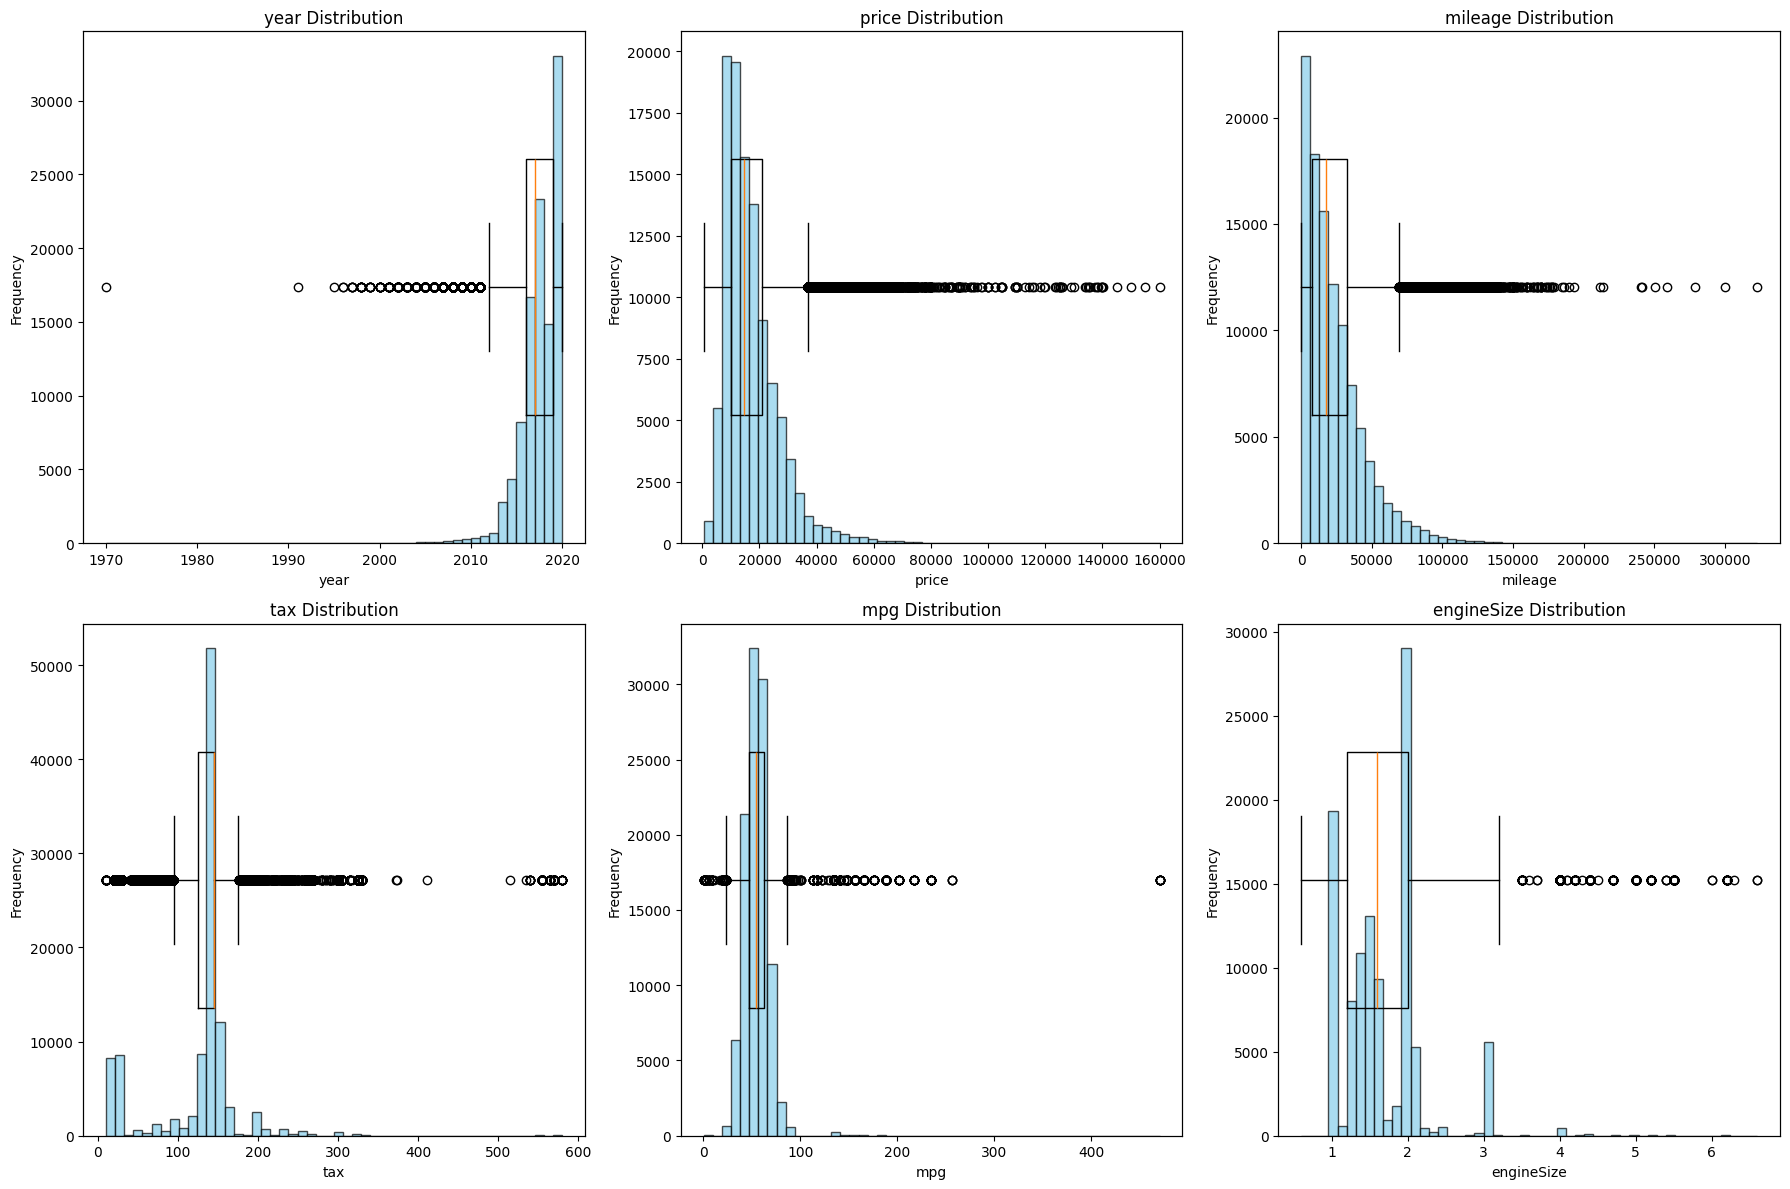

,Shapiro-Wilk Statistic,Shapiro-Wilk p-value,D'Agostino Statistic,D'Agostino p-value,Skewness,Skew Direction,Normally Distributed
year,0.849055,0.0,48433.893736,0.0,-1.945774,Negative,False
price,0.841903,0.0,56912.299129,0.0,2.306871,Positive,False
mileage,0.852514,0.0,39770.485696,0.0,1.788779,Positive,False
tax,0.733959,0.0,16279.521021,0.0,0.285596,Positive,False
mpg,0.815867,0.0,106219.859625,0.0,4.362486,Positive,False
engineSize,0.861198,0.0,31474.788233,0.0,1.413106,Positive,False


In [44]:
# Importing necessary library for normality test
import scipy.stats as stats

# Selecting only numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

normality_test_results = {}

num_cols = len(numeric_cols)

rows = (num_cols + 2) // 3

plt.figure(figsize=(18, 6 * rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, 3, i + 1)
    
    # Histogram
    plt.hist(df[col], bins=50, color="skyblue", edgecolor="black", alpha=0.7)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Box Plot
    plt.twinx()
    plt.boxplot(df[col], vert=False, positions=[0], widths=0.5)
    plt.yticks([])

    # Perform the Shapiro-Wilk Test for normality
    shapiro_test = stats.shapiro(df[col])

    # Perform the D'Agostino's K-squared Test for normality
    dagostino_test = stats.normaltest(df[col])

    # Calculate the skewness
    skewness = df[col].skew()

    # Determine the skew direction
    if skewness > 0:
        skew_direction = "Positive"
    elif skewness < 0:
        skew_direction = "Negative"
    else:
        skew_direction = "None"

    # Storing the results
    normality_test_results[col] = {
        "Shapiro-Wilk Statistic": shapiro_test.statistic,
        "Shapiro-Wilk p-value": shapiro_test.pvalue,
        "D'Agostino Statistic": dagostino_test.statistic,
        "D'Agostino p-value": dagostino_test.pvalue,
        "Skewness": skewness,
        "Skew Direction": skew_direction
    }

plt.tight_layout()
plt.show()

# Convert the dictionary to a DataFrame
normality_results_df = pd.DataFrame(normality_test_results).T

# Adding a column to indicate if the data is normally distributed based on p-values
normality_results_df["Normally Distributed"] = (normality_results_df["Shapiro-Wilk p-value"] > 0.05) & (normality_results_df["D'Agostino p-value"] > 0.05)

normality_results_df

It is evident that none of the numerical data follows a normal distribution.

### **Checking Outliers**

Now, let's proceed with identifying any outliers in the dataset, as this is crucial for ensuring data accuracy and reliability before further analysis.

In [45]:
# Calculating Q1 (25th percentile) and Q3 (75th percentile)
q1 = df[numeric_cols].quantile(0.25)
q3 = df[numeric_cols].quantile(0.75)

# Calculating the IQR
iqr = q3 - q1

# Calculating the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifying outliers
outliers = (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)

# Show rows with outliers
df[outliers.any(axis=1)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,Audi,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0
2,Audi,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4
5,Audi,A1,2016.0,13900.0,Automatic,32260.0,Petrol,30.0,58.9,1.4
6,Audi,A6,2016.0,13250.0,Automatic,76788.0,Diesel,30.0,61.4,2.0
7,Audi,A4,2016.0,11750.0,Manual,75185.0,Diesel,20.0,70.6,2.0
...,...,...,...,...,...,...,...,...,...,...
108535,Volkswagen,Eos,2012.0,5990.0,Manual,74000.0,Diesel,125.0,58.9,2.0
108536,Volkswagen,Fox,2008.0,1799.0,Manual,88102.0,Petrol,145.0,46.3,1.2
108537,Volkswagen,Fox,2009.0,1590.0,Manual,70000.0,Petrol,200.0,42.0,1.4
108538,Volkswagen,Fox,2006.0,1250.0,Manual,82704.0,Petrol,150.0,46.3,1.2


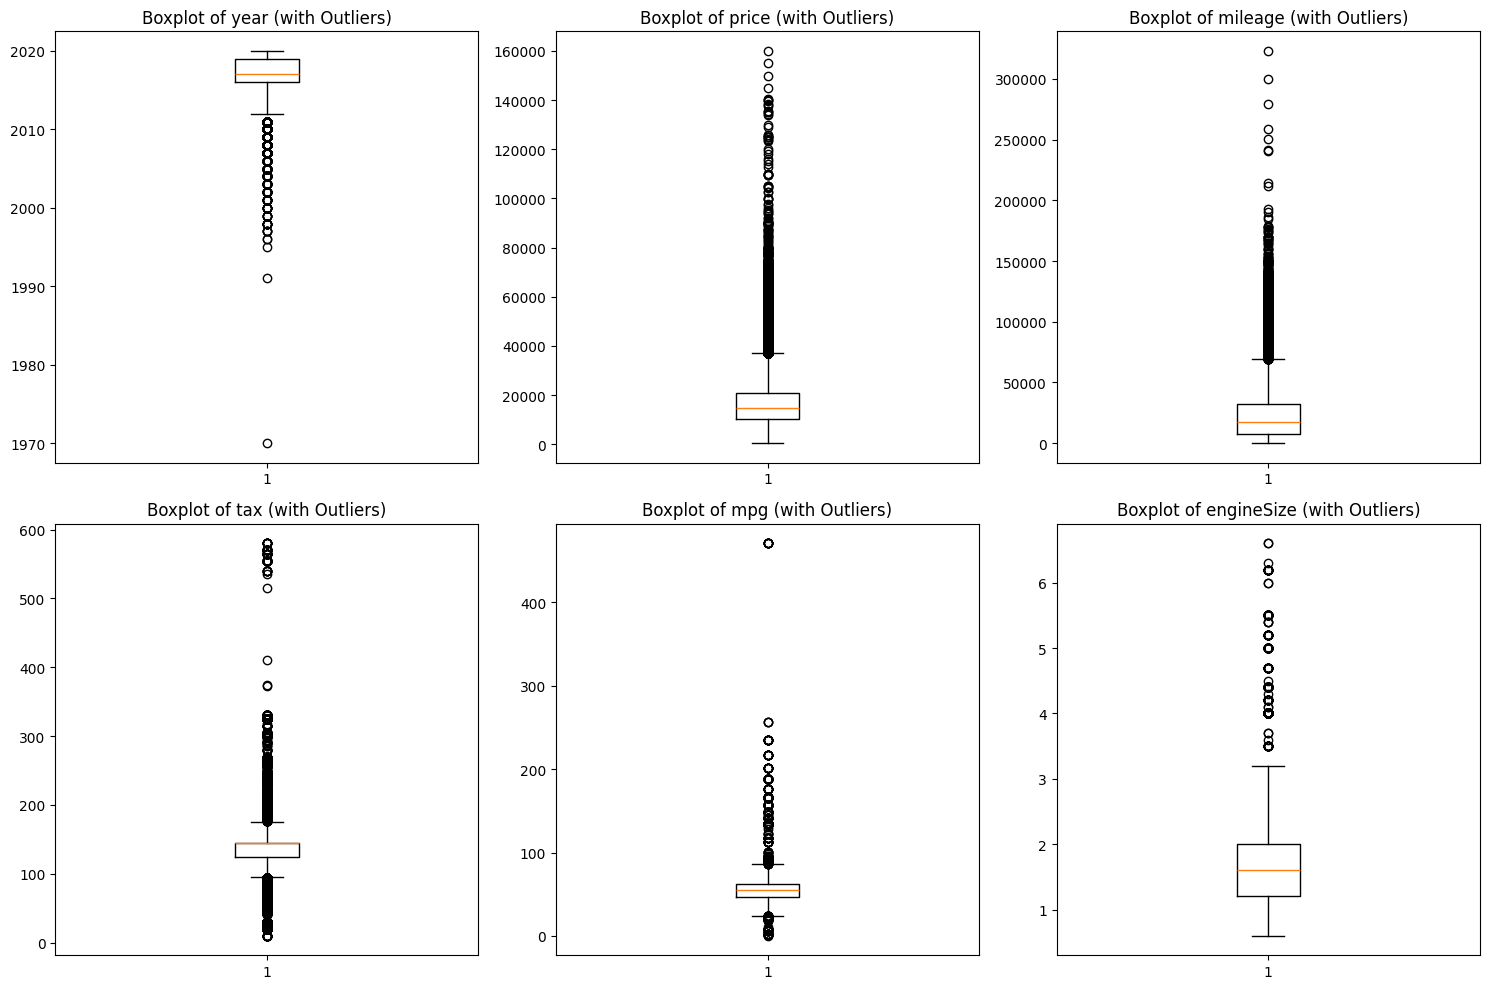

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,year,1939,1.829832,2.011500e+03,2023.500
1,price,4015,3.788951,-5.857000e+03,36935.000
2,mileage,4254,4.014495,-2.938362e+04,69565.375
3,tax,26162,24.689051,9.500000e+01,175.000
4,mpg,917,0.865372,2.355000e+01,86.350
5,engineSize,752,0.709662,-2.220446e-16,3.200


In [46]:
outliers_dict = {}

num_cols = 3
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 5, num_rows * 5))
axes = axes.flatten()

summary_data = []

for i, column in enumerate(numeric_cols):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_dict[column] = outliers
    
    total_outliers = outliers.shape[0]
    percentage = (total_outliers / df.shape[0]) * 100
    
    summary_data.append({
        "Column": column,
        "Total Outliers": total_outliers,
        "Percentage (%)": percentage,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound
    })

    axes[i].set_title(f"Boxplot of {column} (with Outliers)")
    axes[i].boxplot(df[column].dropna())

# Hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

pd.DataFrame(summary_data)

After examining the dataset for outliers, we identified 32,475 rows of data that exhibit outlier characteristics across various columns. These outliers may represent extreme values or anomalies that warrant further investigation and potential handling to ensure the integrity of our analysis.

### **Data Correlation**

To understand the relationships between features in the dataset, we're going to analyze the correlation between numerical variables. This helps identify which features significantly influence the target variable, `price`.

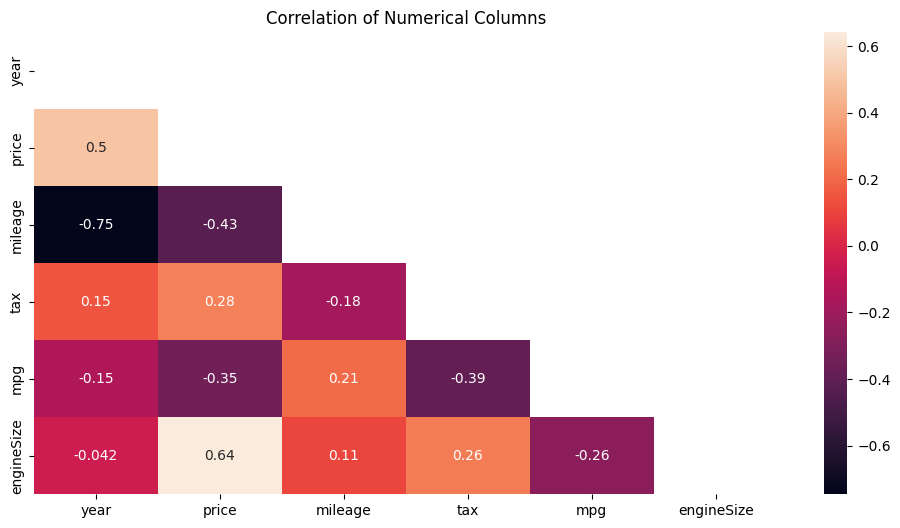

In [47]:
triu = np.triu(df.corr(numeric_only=True, method="spearman"))

# Heatmap for the correlation between numerical number
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True),
            mask=triu,
            annot=True
            )
plt.title("Correlation of Numerical Columns")
plt.show()

1. **Mileage vs. Price**  
   - There is a **moderate negative correlation** (-0.43) between `mileage` and `price`.  
   - This suggests that cars with higher mileage generally have a **lower resale value**.

2. **Engine Size vs. Price**  
   - A **moderate positive correlation** (0.64) exists between `engineSize` and `price`.  
   - Cars with larger engines tend to be **more expensive**.

3. **Year vs. Price**  
   - The car's `year` (age) shows a **moderate positive correlation** (0.50) with `price`.  
   - **Newer vehicles** are typically associated with **higher prices**.

4. **Tax Relationships**  
   - **Price and Tax**: There is a **positive correlation** (0.28), meaning more expensive cars incur **higher taxes**.  
   - **Engine Size and Tax**: A **positive correlation** (0.26) shows that larger vehicles are subject to **higher tax rates**.

5. **Miles Per Gallon (MPG) vs. Price**  
   - `mpg` has a **weak negative correlation** (-0.35) with `price`.  
   - This suggests that **fuel-efficient cars** may be less premium or command lower prices.

### **Implications for Decision-Making**

- The **key predictors** of car prices are:  
  - **Mileage**: Lower mileage cars hold better value.  
  - **Engine Size**: Larger engines are associated with higher prices.  
  - **Tax**: Higher taxes reflect both car size and price.  

These insights can guide pricing strategies, inventory assessments, and customer targeting. 


## **Data Analysis**  

With the dataset cleaned and prepared, the next step is to conduct a detailed data analysis to uncover trends and insights. The analysis will focus on the following areas:  

### 1. **Market Overview and Saturation**  
Analyze the number of listings for each brand, fuel type, and transmission to understand market preferences and saturation.  

### 2. **Impact of Age and Mileage on Pricing**  
Investigate how listing prices decrease with increasing car age and mileage, and calculate depreciation rates for popular brands and models.  

### 3. **Influence of Fuel Type and Transmission**  
Compare listing prices across fuel type categories (e.g., petrol, diesel, hybrid) and analyze price differences between manual and automatic transmission cars.  

### 4. **Role of Tax and Fuel Efficiency (mpg)**  
Assess whether cars with lower annual tax or higher mpg command higher listing prices.  

### 5. **Engine Size Preferences**  
Examine the relationship between engine size and listing prices, identifying market preferences for performance (larger engines) versus economy (smaller engines).  

In [48]:
df = pd.read_csv('UK Used Car_cleaned.csv')

In [49]:
df.head()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4
1,Audi,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0
2,Audi,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4
3,Audi,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0
4,Audi,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0


In [50]:
df.corr(numeric_only=True, method='spearman')

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.606714,-0.810681,0.318237,-0.331559,-0.036551
price,0.606714,1.000000,-0.522288,0.303348,-0.397917,0.580067
mileage,-0.810681,-0.522288,1.000000,-0.263495,0.344759,0.101783
tax,0.318237,0.303348,-0.263495,1.000000,-0.517783,0.138007
mpg,-0.331559,-0.397917,0.344759,-0.517783,1.000000,-0.201128
engineSize,-0.036551,0.580067,0.101783,0.138007,-0.201128,1.000000


### **1. Market Outlook and Saturation**

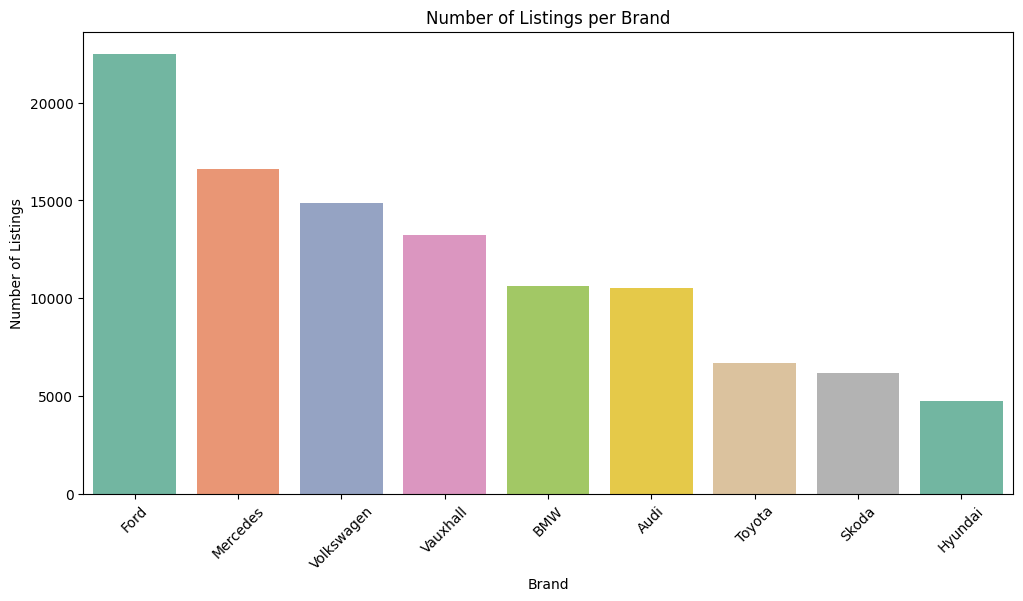

In [51]:
# Count Plot: Number of Listings per Brand
plt.figure(figsize=(12, 6))
sns.countplot(x='brand', data=df, order=df['brand'].value_counts().index, palette='Set2')
plt.title('Number of Listings per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

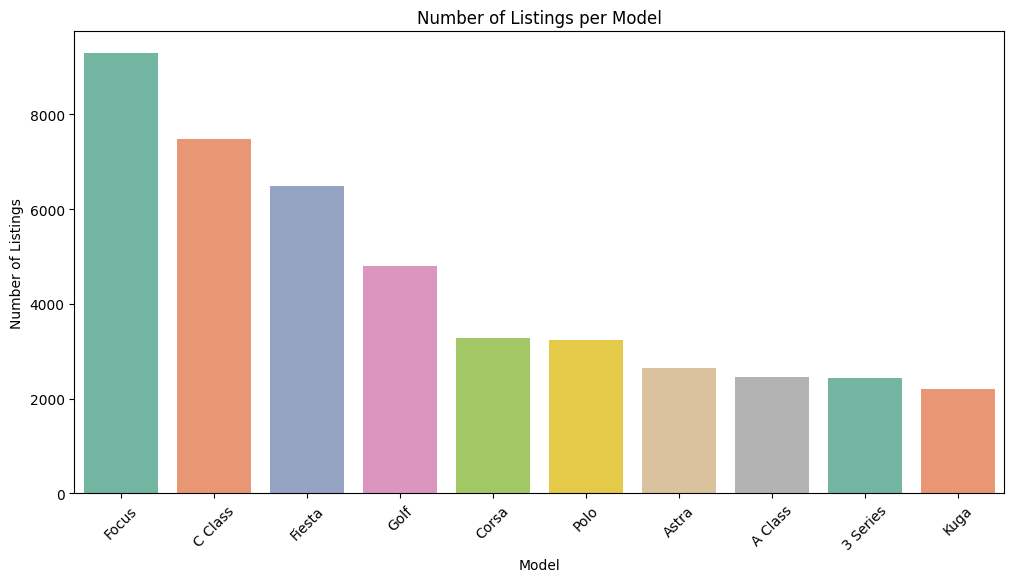

In [52]:
top_model = df['model'].value_counts().head(10).index
filtered_df = df[df['model'].isin(top_model)]


# Count Plot: Number of Listings per Brand
plt.figure(figsize=(12, 6))
sns.countplot(x='model', data=filtered_df, order=filtered_df['model'].value_counts().index,  palette='Set2')
plt.title('Number of Listings per Model')
plt.xlabel('Model')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

1. Ford:
- Insight: Ford has the most number of listings, indicating a strong presence in the used car market.
- Possible Reasons:
    - **Ford is one of the most popular car brands in the UK**, known for offering a **wide range of vehicles from affordable models** (e.g., Ford Fiesta) to family-friendly options (e.g., Ford Focus) and utility vehicles. This makes it appealing to a broad audience.
    - Ford vehicles are generally known for their **affordability and reliability**, making them a common choice for both new and used car buyers. Their high production volume ensures that more vehicles enter the used car market.
    - Many Ford vehicles are **commonly used for fleets** (e.g., rental cars or company cars), which means a **steady stream of these cars enters the second-hand market** after a few years of use.
    - **The brand has excellent availability of spare parts and a wide network of service providers**, making it easier for buyers to maintain the vehicles.

2. Mercedes-Benz:
- Insight: Mercedes-Benz also has a significant number of listings, likely due to its appeal as a luxury brand.
- Possible Reasons:
    - Mercedes is a popular choice for **buyers seeking luxury, performance, and status, which increases the demand** for its cars.
    - Mercedes vehicles are known to **retain value relatively well**, making them a **viable option in the used car market** for buyers who cannot afford a new model but still want a luxury brand.
    - **Many Mercedes vehicles are leased rather than purchased outright**, which means a large number of cars return to the market as used vehicles after the lease period ends.
    - Mercedes **offers a wide range of vehicles**, from compact cars to SUVs and high-performance models, which broadens its appeal across demographics.

3. Volkswagen:
- Insight: Volkswagen has a high number of listings, indicating it’s a trusted choice for many car buyers.
- Possible Reasons:
    - Volkswagen is synonymous with **reliability and practicality**, which makes it a preferred choice for families and professionals alike.
    - Models like the Volkswagen Golf and Polo are among the **most popular cars in Europe and have a strong resale market**, which increases the supply of used listings.
    - Volkswagen fulfill to **multiple market segments**, offering affordable options alongside premium models like the Passat and Touareg.

Reference: 
- https://motorway.co.uk/sell-my-car/guides/most-popular-cars-in-the-uk
- https://www.best-selling-cars.com/britain-uk/2020-full-year-britain-best-selling-car-models-in-the-uk/

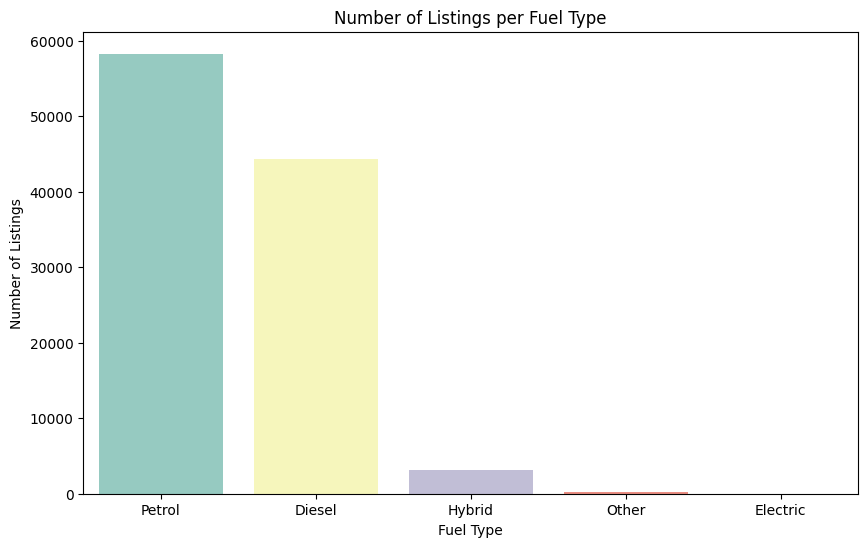

In [53]:
# Count Plot: Number of Listings per Fuel Type
plt.figure(figsize=(10, 6))
sns.countplot(x='fuelType', data=df, order=df['fuelType'].value_counts().index, palette='Set3')
plt.title('Number of Listings per Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Listings')
plt.show()


- Petrol and diesel cars dominated due to their affordability and widespread availability, with petrol being the most popular due to lower upfront costs compared to diesel​
- Diesel cars were initially preferred for fuel efficiency but saw a sharp decline in popularity after environmental concerns and scandals like Dieselgate​
- While hybrids and electric vehicles grew in market share toward the end of this period, petrol and diesel remained dominant up to 2020, making up the majority of car registrations​

Reference: https://autovista24.autovistagroup.com/news/significant-decline-in-petrol-and-diesel-as-electrified-options-advance/

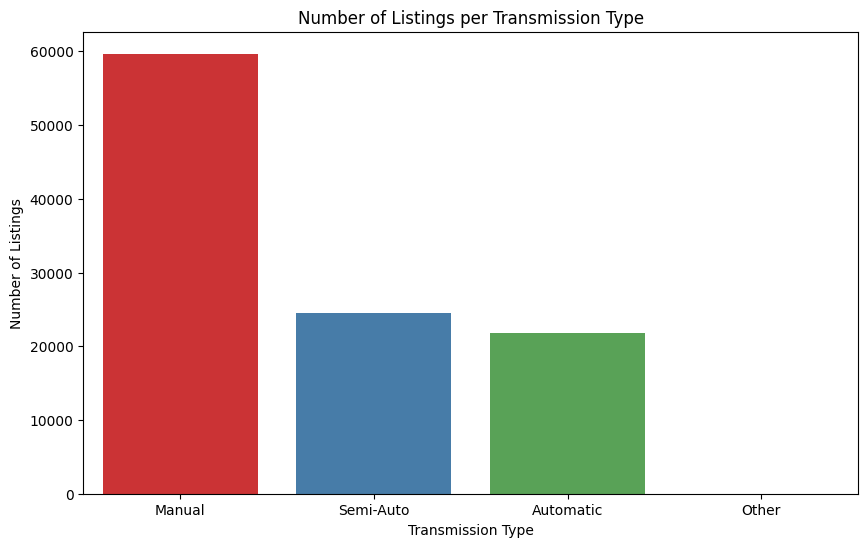

In [54]:
# Count Plot: Number of Listings per Transmission Type
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=df, order=df['transmission'].value_counts().index, palette='Set1')
plt.title('Number of Listings per Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Listings')
plt.show()

- Manual transmission has the most number of listed car in the market. Manual transmissions were traditionally popular in the UK due to their lower manufacturing costs and a preference for the control they offered, especially for navigating rural and hilly terrains​
- By 2020, automatic vehicles were rapidly gaining ground, accounting for about 43% of new car sales. This shift was driven by advancements in automatic transmission technology, making them more fuel-efficient and responsive compared to older models​
- Automatics became favored for their convenience in urban settings, particularly in stop-and-go traffic. They offered a smoother driving experience, eliminating the frequent use of a clutch pedal and gear stick, which appealed to a broader range of drivers​

Reference: https://www.whatcar.com/news/which-cars-come-with-a-manual-gearbox/n26678

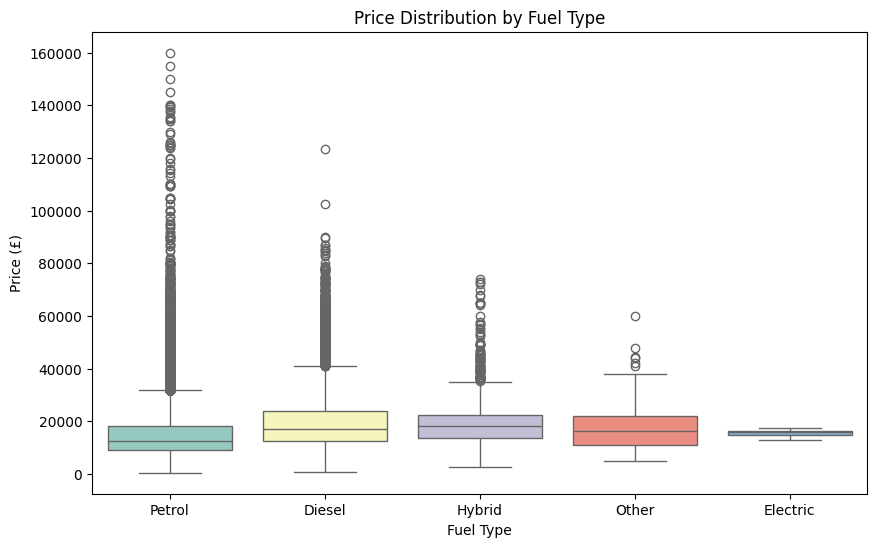

In [55]:
# Boxplot: Price Distribution by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuelType', y='price', data=df, palette='Set3')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (£)')
plt.show()


- Petrol and diesel have the biggest proportion in the market due to their affordability and commonality in cars.
- Petrol has the widest price range, likely due to the wide variety of petrol-powered vehicle models available across different price segments.
- Hybrid and electric vehicles have more concentrated price distributions, as these newer technologies are still primarily targeted at higher-end segments.

Reference: https://www.best-selling-cars.com/electric/2020-full-year-europe-car-sales-by-fuel-type-in-the-eu-uk-and-efta/

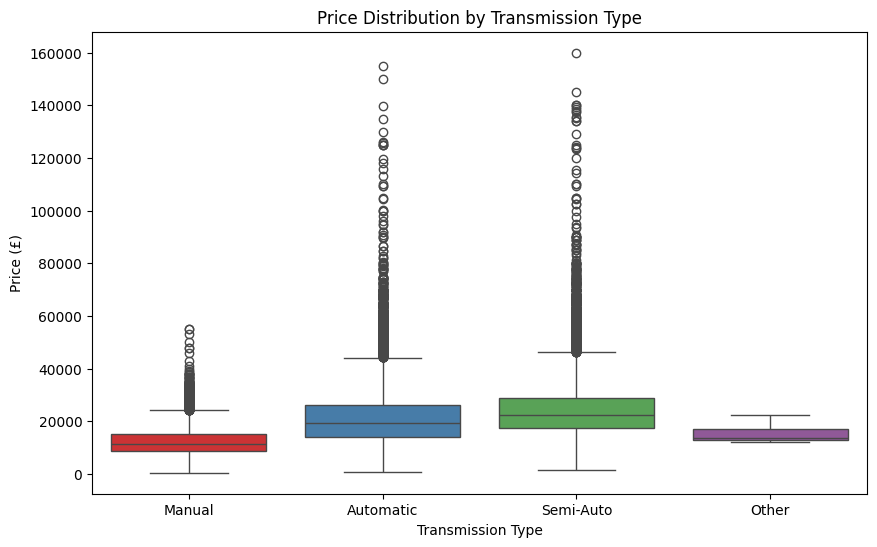

In [56]:
# Boxplot: Price Distribution by Transmission Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df, palette='Set1')
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price (£)')
plt.show()

- Manual transmission vehicles have the widest price range, as manual transmissions are found across all vehicle segments from economy to luxury.
- Automatic and semi-auto transmission vehicles have more concentrated price distributions, as these transmission types are more common in mid-range and higher-end vehicles.
- The "Other" transmission type category shows a small number of vehicles with a wide price range, likely representing specialized or custom transmission options.

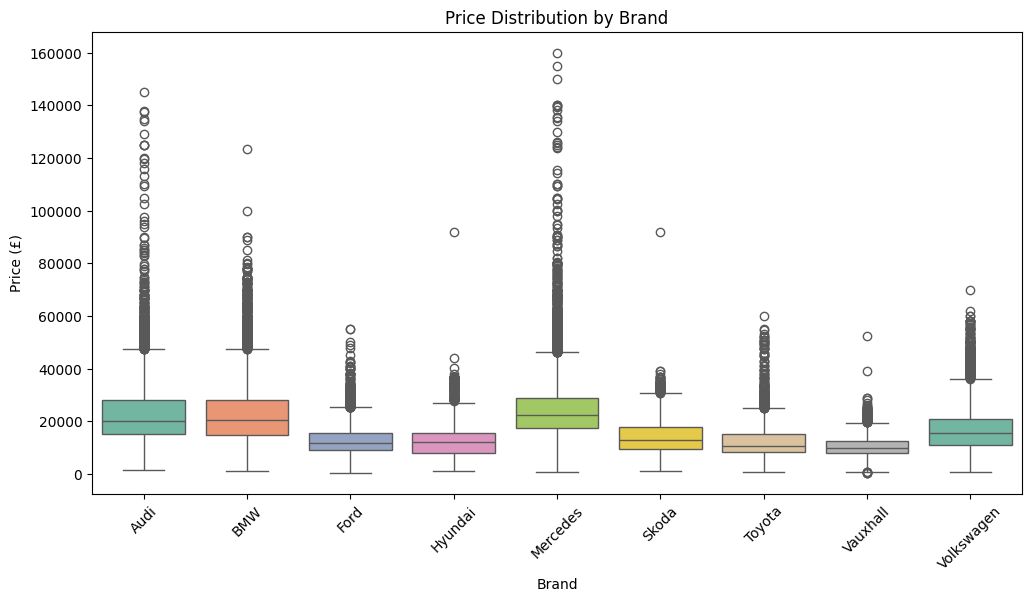

In [57]:
top_brands = df['brand'].value_counts().head(10).index
filtered_df = df[df['brand'].isin(top_brands)]

# Boxplot: Price Distribution by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='price', data=filtered_df, palette='Set2')
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price (£)')
plt.xticks(rotation=45)
plt.show()

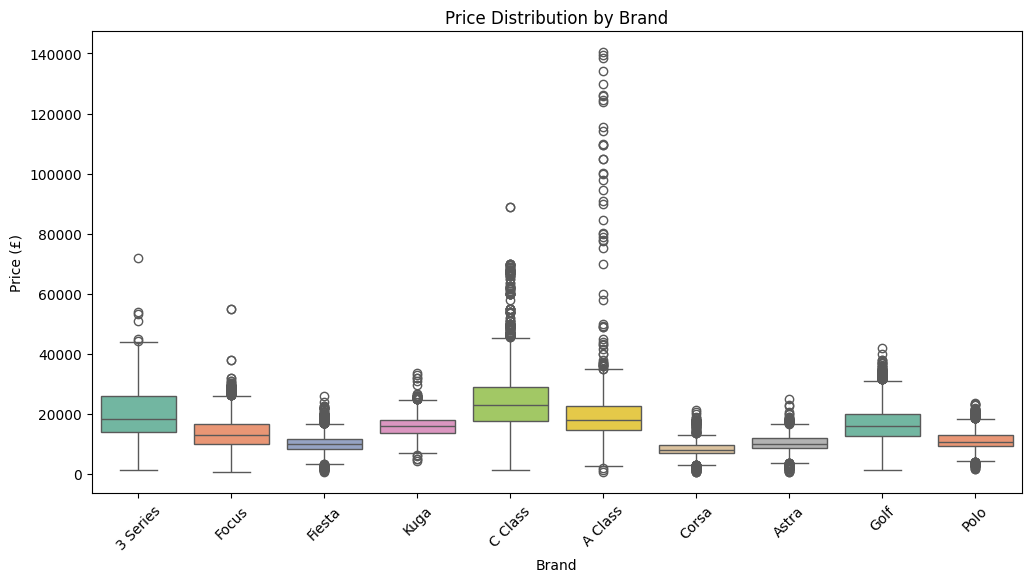

In [58]:
top_brands = df['model'].value_counts().head(10).index
filtered_df = df[df['model'].isin(top_brands)]

# Boxplot: Price Distribution by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='model', y='price', data=filtered_df, palette='Set2')
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price (£)')
plt.xticks(rotation=45)
plt.show()

- Audi and BMW have the highest overall price range, as these are premium German brands that offer vehicles across multiple price tiers from entry-level to ultra-luxury.
- Ford, Hyundai, and Mercedes-Benz exhibit more concentrated price distributions, as these brands meet to a broader mainstream market with more standardized pricing across their model lineups.
- Skoda, Toyota, Volkswagen, and Vauxhall show moderate to wider price distributions, indicating they offer vehicles spanning the budget to mid-range segments.



### **2. Impact of Age (year) and Mileage**

In [59]:
df.head()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4
1,Audi,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0
2,Audi,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4
3,Audi,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0
4,Audi,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0


In [60]:
# Define the current year
CURRENT_YEAR = 2020

# Calculate car age
df['age'] = CURRENT_YEAR - df['year']

# Verify the calculation
print(df[['year', 'age']].head())


     year  age
0  2017.0  3.0
1  2016.0  4.0
2  2016.0  4.0
3  2017.0  3.0
4  2019.0  1.0


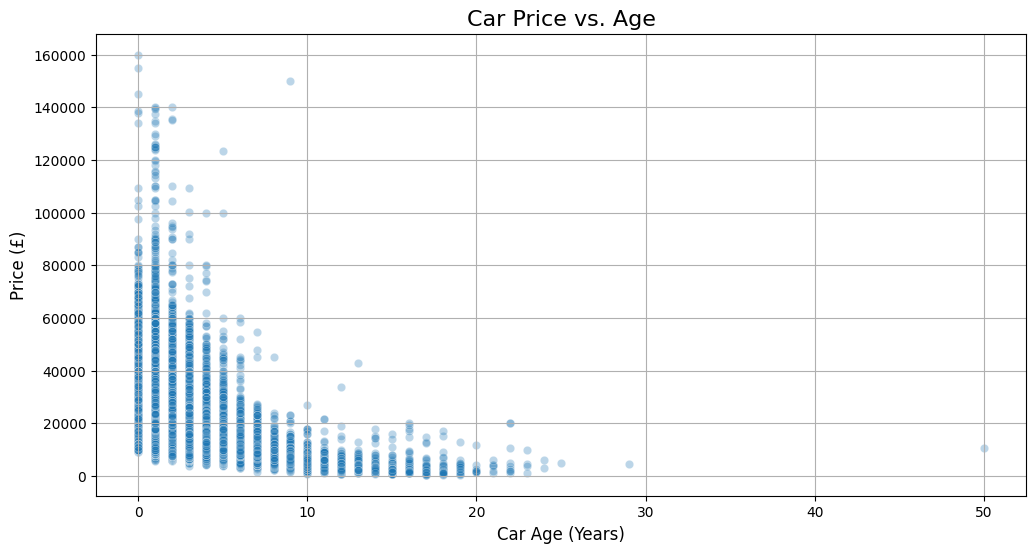

In [61]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='price', alpha=0.3, palette='tab10', legend=False)
plt.title('Car Price vs. Age', fontsize=16)
plt.xlabel('Car Age (Years)', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.grid(True)
plt.show()

- The data shows a clear negative correlation between car price and age, indicating that older cars tend to have lower prices.
- The wide distribution of data points suggests significant variation in prices even for cars of the same age, likely due to factors like mileage, condition, and optional features.
- The pattern aligns with the general principle of vehicle depreciation over time.

Reference: 
- https://www.conceptcarcredit.co.uk/blog/car-depreciation-mileage-vs-age-vs-condition/#:~:text=A%203%2Dyear%20old%2C%20%C2%A3,priced%20under%20%C2%A315%2C000%20accordingly.

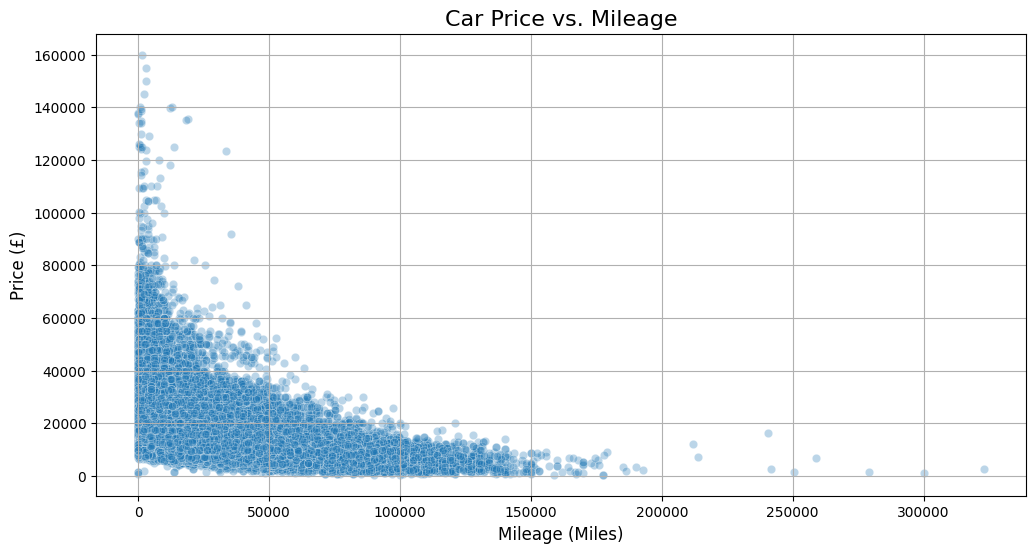

In [62]:
# Plotting: Price vs. Mileage
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.3, palette='tab10', legend=False)
plt.title('Car Price vs. Mileage', fontsize=16)
plt.xlabel('Mileage (Miles)', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.grid(True)
plt.show()

- The scatterplot demonstrates a negative relationship between car price and mileage, where higher mileage cars tend to have lower prices.
- The clustering of data points at lower mileages and prices suggests that cars with lower mileage and higher prices are more common in the market.
- The dispersed pattern at higher mileages and lower prices indicates a wider range of pricing for cars with substantial mileage, likely due to factors like condition and maintenance history.

Reference: 
- https://www.conceptcarcredit.co.uk/blog/car-depreciation-mileage-vs-age-vs-condition/#:~:text=A%203%2Dyear%20old%2C%20%C2%A3,priced%20under%20%C2%A315%2C000%20accordingly.

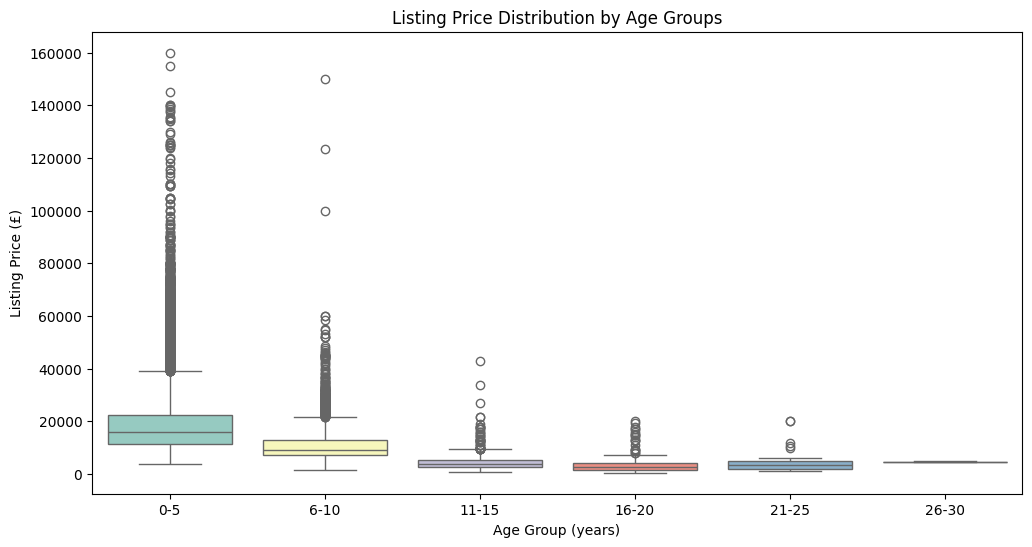

In [63]:
# Define age bins
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='price', data=df, palette='Set3')
plt.title('Listing Price Distribution by Age Groups')
plt.xlabel('Age Group (years)')
plt.ylabel('Listing Price (£)')
plt.show()


- The box plot shows that newer cars (0-5 years old) have the highest median prices and the widest range of prices, reflecting the higher demand and greater variety in the newer car market.
- Older age groups generally exhibit lower median prices and tighter price distributions, as the market values older cars less and pricing becomes more standardized.
- This pattern aligns with the expected depreciation of vehicle value over time as cars age.

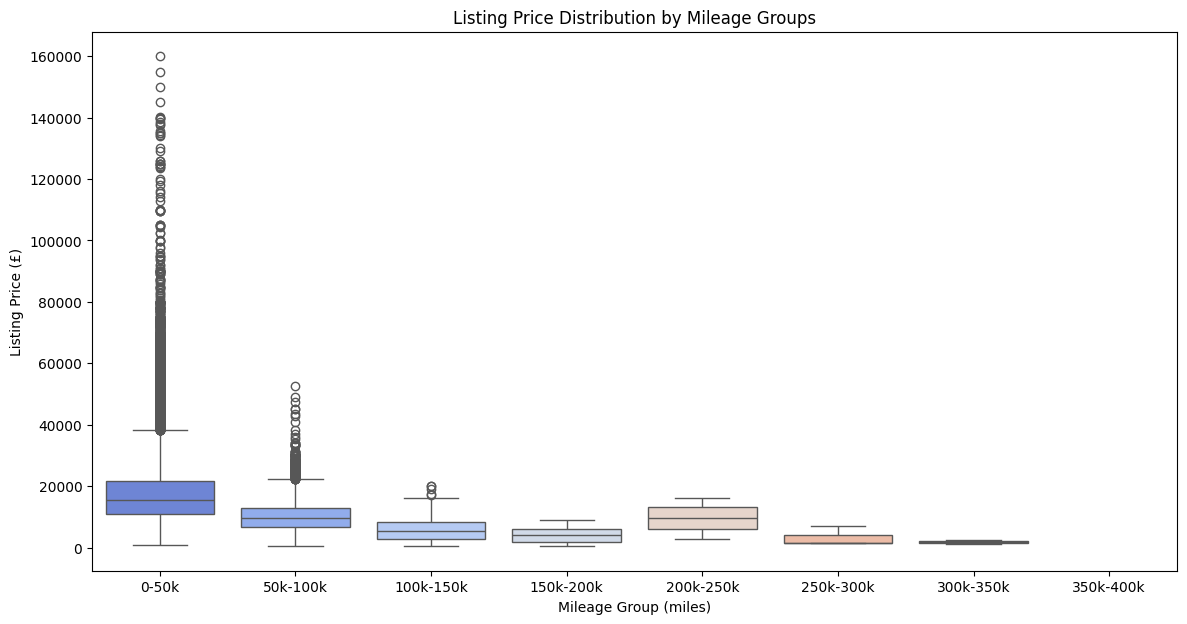

In [64]:
# Define mileage bins
mileage_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000]
mileage_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k']
df['mileage_group'] = pd.cut(df['mileage'], bins=mileage_bins, labels=mileage_labels, right=False)

plt.figure(figsize=(14, 7))
sns.boxplot(x='mileage_group', y='price', data=df, palette='coolwarm')
plt.title('Listing Price Distribution by Mileage Groups')
plt.xlabel('Mileage Group (miles)')
plt.ylabel('Listing Price (£)')
plt.show()


- The box plot illustrates that lower mileage groups (0-50k, 50k-100k) have the highest median prices and the widest price ranges, indicating that lower mileage cars are more desirable and command a premium.
- Higher mileage groups (200k-250k, 250k-300k, etc.) have progressively lower median prices and tighter price distributions, as mileage becomes a more significant factor in determining a car's value.
- This relationship between mileage and price is consistent with the general principle that higher mileage vehicles depreciate faster and have lower market values.

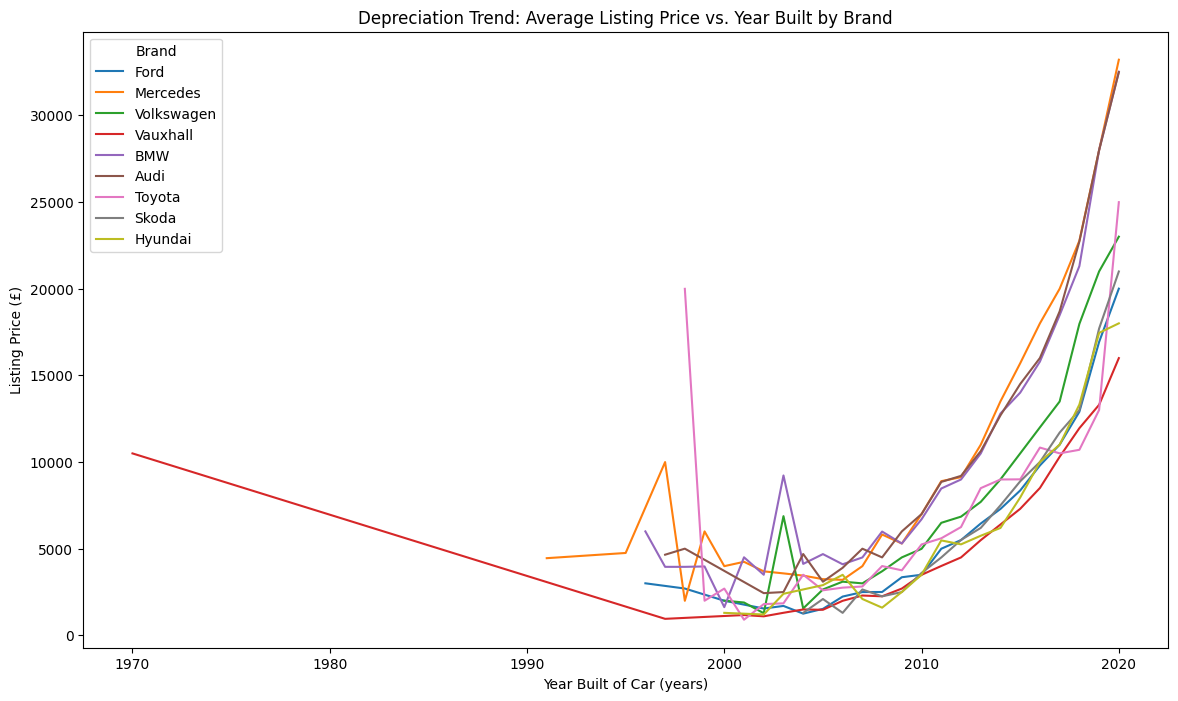

In [65]:
# Identify top 10 brands by number of listings
top_brands = df['brand'].value_counts().head(10).index
df_top_brands = df[df['brand'].isin(top_brands)]

# Group by brand and age, then calculate average price
brand_age_price = df_top_brands.groupby(['brand', 'year'])['price'].median().reset_index()

# Pivot the data for easier analysis
brand_age_pivot = brand_age_price.pivot(index='year', columns='brand', values='price')

# Plotting the depreciation trend for top brands
plt.figure(figsize=(14, 8))
for brand in top_brands:
    sns.lineplot(data=brand_age_pivot[brand], label=brand)
plt.title('Depreciation Trend: Average Listing Price vs. Year Built by Brand')
plt.xlabel('Year Built of Car (years)')
plt.ylabel('Listing Price (£)')
plt.legend(title='Brand')
plt.show()


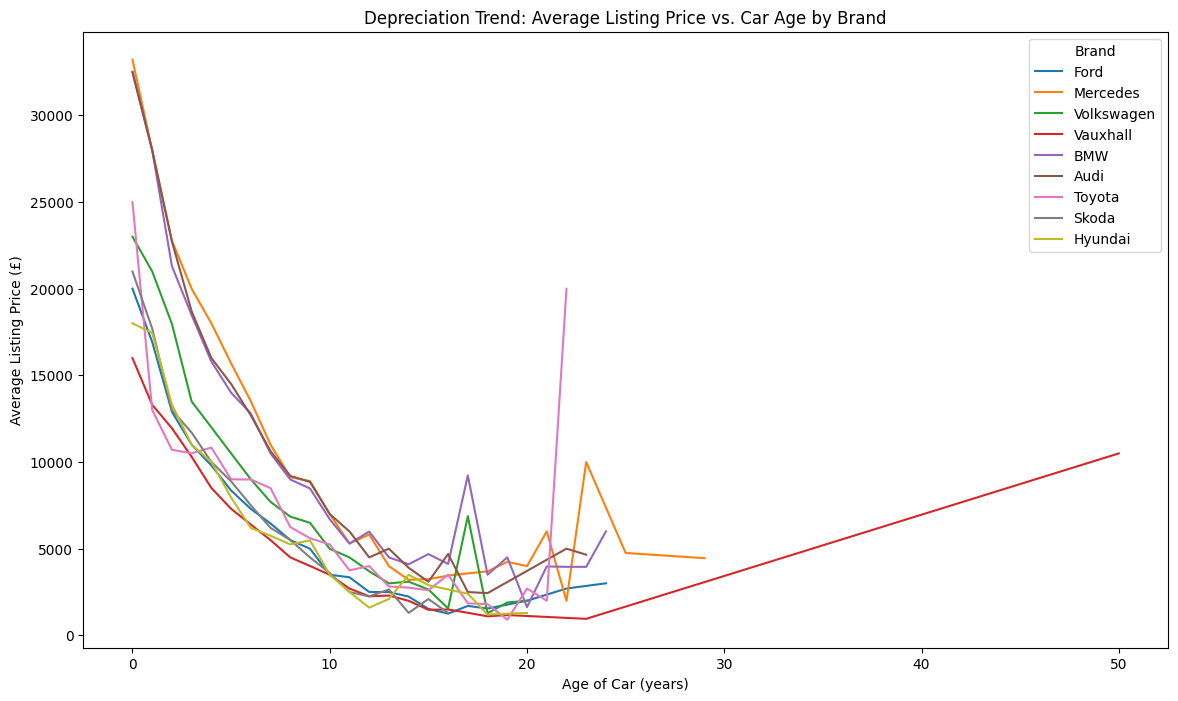

In [66]:
# Identify top 10 brands by number of listings
top_brands = df['brand'].value_counts().head(10).index
df_top_brands = df[df['brand'].isin(top_brands)]

# Group by brand and age, then calculate average price
brand_age_price = df_top_brands.groupby(['brand', 'age'])['price'].median().reset_index()

# Pivot the data for easier analysis
brand_age_pivot = brand_age_price.pivot(index='age', columns='brand', values='price')

# Plotting the depreciation trend for top brands
plt.figure(figsize=(14, 8))
for brand in top_brands:
    sns.lineplot(data=brand_age_pivot[brand], label=brand)
plt.title('Depreciation Trend: Average Listing Price vs. Car Age by Brand')
plt.xlabel('Age of Car (years)')
plt.ylabel('Average Listing Price (£)')
plt.legend(title='Brand')
plt.show()


- The line chart shows that most car brands exhibit a steep depreciation curve, with prices dropping rapidly in the first 10-15 years, reflecting the significant loss in value as vehicles age.
- However, some premium brands like Audi and BMW maintain higher prices even for older vehicles, likely due to their desirability, build quality, and brand reputation.
- The divergent depreciation patterns across brands suggest that factors like market positioning, target audience, and the perceived value of the brand play a role in determining how quickly a vehicle's price declines over time.

### **3. Influence of Fuel Type and Transmission**

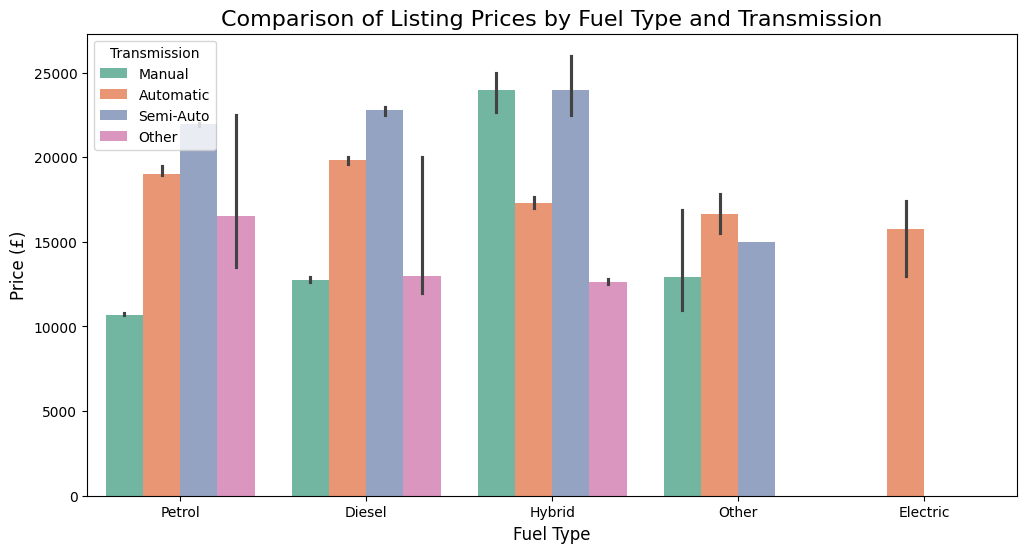

In [67]:
# Create a figure and axis
plt.figure(figsize=(12, 6))

# Create a bar plot comparing prices across fuelType and transmission
sns.barplot(x='fuelType', y='price', hue='transmission', data=df, palette='Set2', estimator=np.median)

# Customize the plot
plt.title('Comparison of Listing Prices by Fuel Type and Transmission', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.legend(title='Transmission', loc='upper left')

# Show the plot
plt.show()

- The plot shows a clear distinction in pricing between different fuel types, with hybrid vehicles having the highest median and range of prices, followed by diesel, petrol, and other/electric vehicles.
- For each fuel type, there are notable differences in the price distributions based on the transmission type. Automatic transmissions tend to have higher median prices compared to manual or semi-auto transmissions.
- The variation in price ranges is most pronounced for hybrid vehicles, with a wider spread of prices compared to the other fuel types. This suggests hybrid vehicles may offer a greater variety of premium, high-end models in addition to more affordable options.

Reference:
https://motorway.co.uk/sell-my-car/guides/does-fuel-type-impact-the-value-of-your-car#:~:text=This%20depends%20on%20how%20you,valuable%20in%20the%20long%20term.

### **4. Role of Tax and Fuel Efficiency (mpg)**

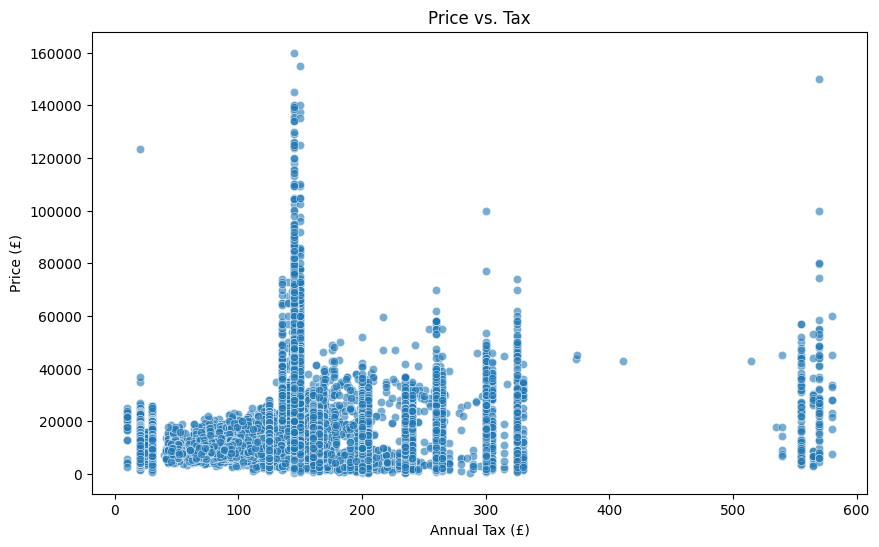

In [68]:
# Scatter Plot: Price vs. Tax
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tax', y='price', data=df, alpha=0.6)
plt.title('Price vs. Tax')
plt.xlabel('Annual Tax (£)')
plt.ylabel('Price (£)')
plt.show()

- The data points form a roughly linear pattern, suggesting a positive correlation between price and tax. Higher taxes tend to result in higher prices.
- There is a lot of variability in the data, with prices ranging from around £20,000 to over £150,000 for similar tax levels. This indicates that factors other than just tax also influence the price.
- The highest priced vehicles tend to have the highest tax levels, which aligns with the general trend of more expensive vehicles having higher associated taxes.

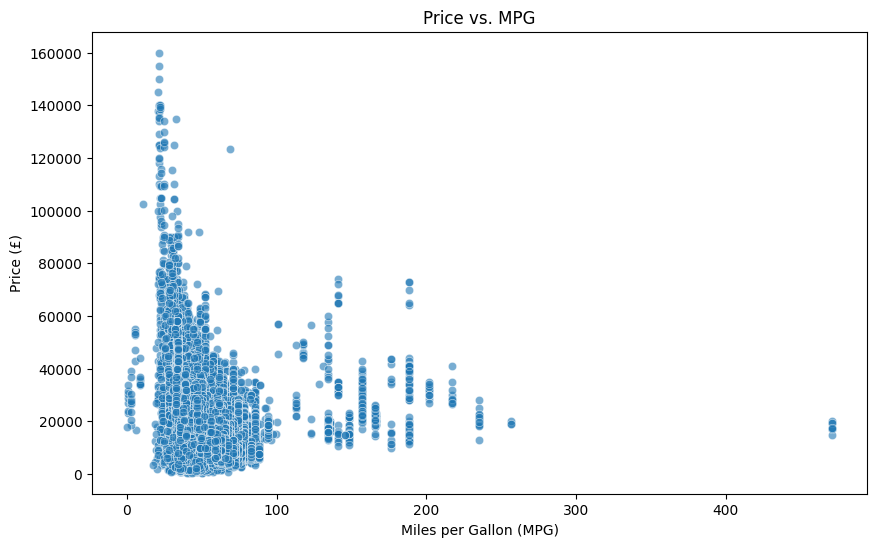

In [69]:
# Scatter Plot: Price vs. MPG (Miles per Gallon)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mpg', y='price', data=df, alpha=0.6)
plt.title('Price vs. MPG')
plt.xlabel('Miles per Gallon (MPG)')
plt.ylabel('Price (£)')
plt.show()

- The data points show an inverse relationship, with higher MPG vehicles generally having lower prices. This makes sense, as more fuel efficient vehicles are often more affordable.
- There is a wide spread of data, with a lot of variability in prices for any given MPG level. This suggests other variables beyond just fuel efficiency impact the final vehicle price.
- The highest priced vehicles tend to cluster on the left side of the graph, indicating they have lower MPG ratings compared to the more affordable vehicle because they usually have big engine, so the fuel efficiency is lower than other.

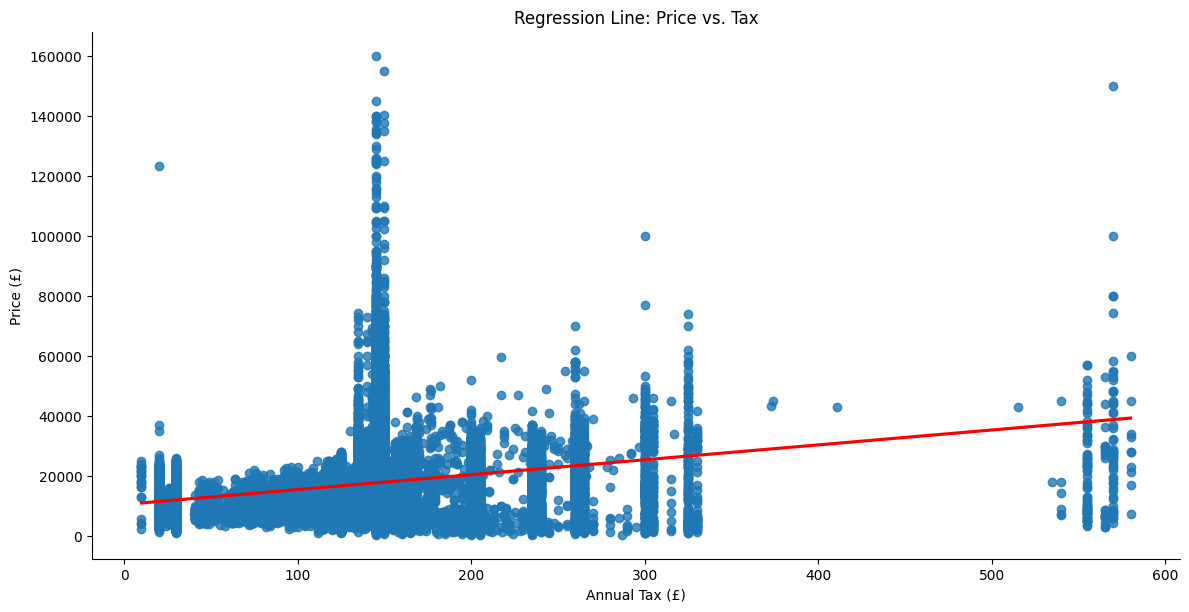

In [70]:
# Fit regression lines to understand trends
sns.lmplot(x='tax', y='price', data=df, aspect=2, height=6, line_kws={'color': 'red'})
plt.title('Regression Line: Price vs. Tax')
plt.xlabel('Annual Tax (£)')
plt.ylabel('Price (£)')
plt.show()

- The regression line shows a clear positive correlation between price and tax, confirming the trend observed in the first graph.
- The regression line provides a better fit to the data compared to the scattered points, suggesting price can be reasonably predicted from tax level alone.
- The data points still show significant variability around the regression line, indicating other factors beyond just tax impact final vehicle prices.

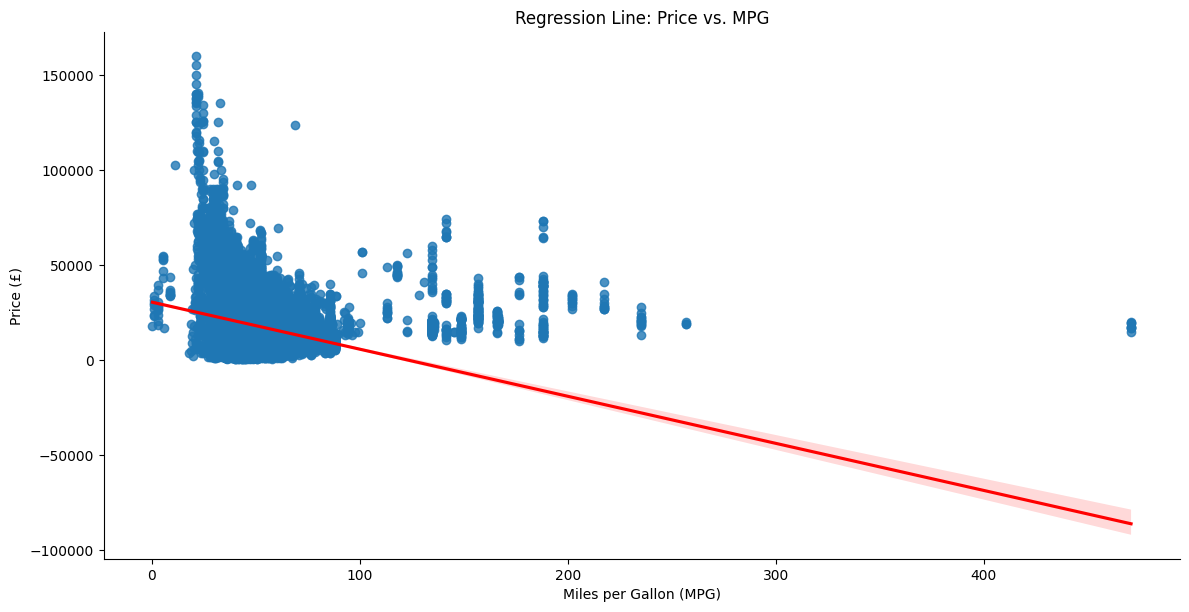

In [71]:
sns.lmplot(x='mpg', y='price', data=df, aspect=2, height=6, line_kws={'color': 'red'})
plt.title('Regression Line: Price vs. MPG')
plt.xlabel('Miles per Gallon (MPG)')
plt.ylabel('Price (£)')
plt.show()

- The regression line demonstrates an negative relationship between price and MPG, aligning with the trend seen in the second graph.
- The regression line provides a reasonably good fit to the data, meaning MPG can be used to estimate approximate vehicle prices.
- There is more variability at the higher price and lower MPG end of the graph, suggesting other factors become more influential for the most expensive, least efficient vehicles.

In [72]:
df['price'].min()

450.0

### **5. Engine Size Preferences**

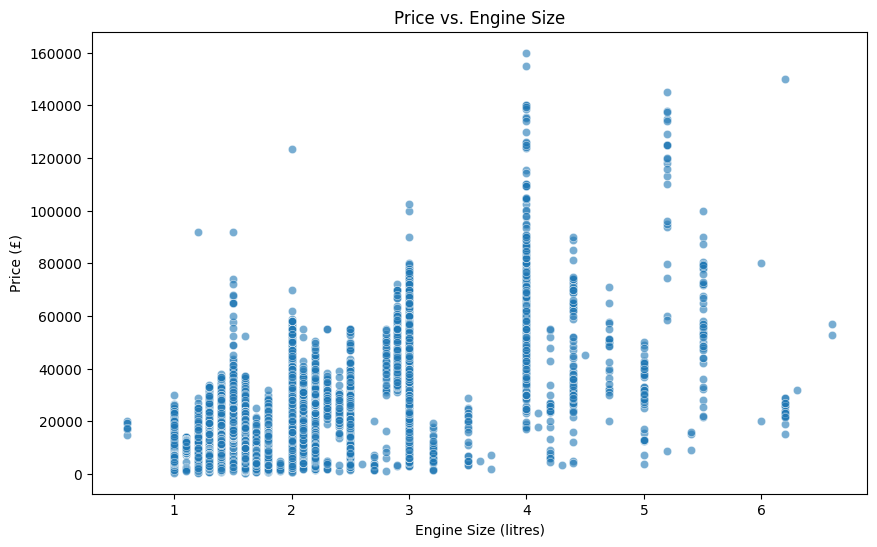

In [73]:
# Scatter Plot: Price vs. Engine Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engineSize', y='price', data=df, alpha=0.6)
plt.title('Price vs. Engine Size')
plt.xlabel('Engine Size (litres)')
plt.ylabel('Price (£)')
plt.show()

- The positive correlation between engine size and vehicle price makes sense in the UK market, where larger engines are often associated with more premium, powerful, and expensive vehicle models.
- The significant variability in prices for similar engine sizes suggests factors beyond just engine size, such as brand, model, trim level, features, and market demand, play a major role in determining final vehicle pricing in the UK.
- The dense clustering of data points at smaller engine sizes indicates there is a larger supply and variety of vehicles with compact and mid-size engines available to UK consumers compared to the larger engine options.

Reference: https://www.cuvva.com/how-insurance-works/engine-size-and-insurance-price#:~:text=Unsurprisingly%2C%20more%20powerful%20cars%20tend,a%20driver%20with%20more%20experience.

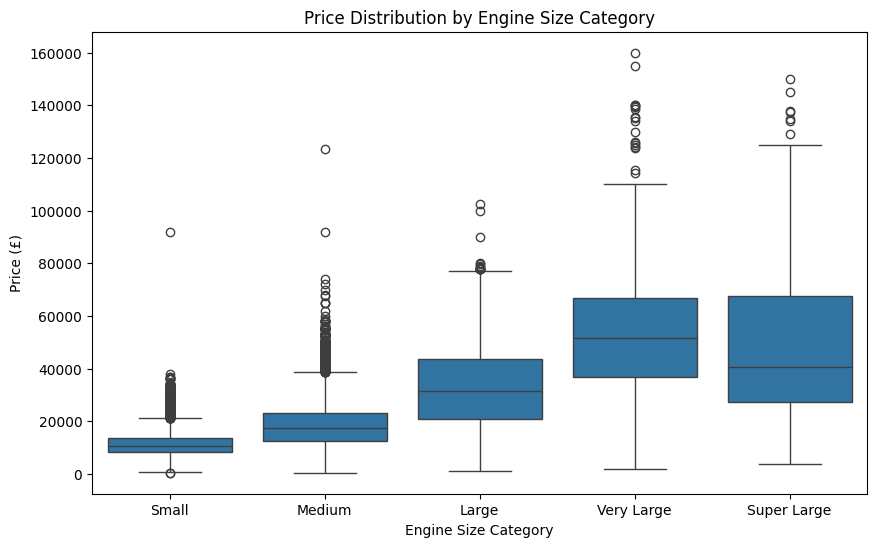

In [74]:
# Boxplot to differentiate performance (larger engines) vs. economy (smaller engines)
# Create bins to classify engines into categories: small, medium, large
bins = [0, 1.5, 2.5, 3.5, 5, 10]  # Defining categories based on engine size (in litres)
labels = ['Small', 'Medium', 'Large', 'Very Large', 'Super Large']
df['engineCategory'] = pd.cut(df['engineSize'], bins=bins, labels=labels, right=False)

# Boxplot: Price distribution by engine size category
plt.figure(figsize=(10, 6))
sns.boxplot(x='engineCategory', y='price', data=df)
plt.title('Price Distribution by Engine Size Category')
plt.xlabel('Engine Size Category')
plt.ylabel('Price (£)')
plt.show()

- The widening price range as engine size increases aligns with the UK market, where larger engines are typically found in the more luxurious, high-end vehicle segments that command a broader spectrum of pricing.
- The steady rise in median prices across the engine size categories reinforces that engine displacement is a key factor influencing vehicle pricing in the UK, with larger engines generally equating to higher base prices.
- The overlapping price ranges between each engine size bins suggests other non-engine factors, such as features, brand, and trim, also significantly impact pricing in the UK car market, leading to some blurring of the price distributions.

## **Modeling**

Following the data analysis, the next step is to build predictive models aimed at forecasting car prices based on the identified factors. In this phase, we will apply various machine learning algorithms to develop a model that can effectively predict car prices, taking into account key features such as age, mileage, fuel type, transmission, engine size, etc. By doing so, we aim to identify the most influential variables and optimize the model's performance for accurate price predictions.

In [57]:
df = pd.read_csv("UK Used Car_cleaned.csv")
df

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4
1,Audi,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0
2,Audi,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4
3,Audi,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0
4,Audi,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
105961,Volkswagen,Eos,2012.0,5990.0,Manual,74000.0,Diesel,125.0,58.9,2.0
105962,Volkswagen,Fox,2008.0,1799.0,Manual,88102.0,Petrol,145.0,46.3,1.2
105963,Volkswagen,Fox,2009.0,1590.0,Manual,70000.0,Petrol,200.0,42.0,1.4
105964,Volkswagen,Fox,2006.0,1250.0,Manual,82704.0,Petrol,150.0,46.3,1.2


### **Define X and y**

For this analysis, the **features** (`X`) will include all the columns in the dataset except for the `price` column, which will serve as our **target** (`y`). The target variable represents the value we aim to predict, while the features provide the necessary input data for making those predictions. By excluding `price` from the features, we ensure that the model is predicting based solely on the other variables. 

In [58]:
X = df.drop(columns="price")
y = df["price"]

display(X.head(), y.head())

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017.0,Manual,15735.0,Petrol,150.0,55.4,1.4
1,Audi,A6,2016.0,Automatic,36203.0,Diesel,20.0,64.2,2.0
2,Audi,A1,2016.0,Manual,29946.0,Petrol,30.0,55.4,1.4
3,Audi,A4,2017.0,Automatic,25952.0,Diesel,145.0,67.3,2.0
4,Audi,A3,2019.0,Manual,1998.0,Petrol,145.0,49.6,1.0


0    12500.0
1    16500.0
2    11000.0
3    16800.0
4    17300.0
Name: price, dtype: float64

### **Data Splitting**

Next, we'll split the data for both `X` (features) and `y` (target) into training and testing sets using an 80:20 ratio. We set `random_state = 0` to ensure reproducibility of the results. The split data will be stored in the following variables:

- `X_train` for the training features
- `X_test` for the testing features
- `y_train` for the training target
- `y_test` for the testing target

This split allows us to train the model on 80% of the data and test its performance on the remaining 20%.

In [59]:
# import the library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

### **Data Preprocessing**

To begin data preprocessing, we will first analyze the dataset by examining the **number of unique values**, identifying any **missing values**, and checking the **data types** of each feature. This analysis helps us understand the structure of the data, determine if any features need encoding or imputation, and decide on appropriate preprocessing techniques for each variable.

In [60]:
# Checking unique values across features
pd.DataFrame(
    {
        "Column": X.columns.values,
        "# of Unique": [X[col].nunique() for col in X.columns],
        "Types": X.dtypes.values,
        "Missing Values": [X[col].isna().sum() for col in X.columns],
        "Values": [
            list(X[col].unique()) if X[col].dtype == "object" else X[col].unique()
            for col in X.columns
        ]
    }
)

,Column,# of Unique,Types,Missing Values,Values
0,brand,9,object,0,"[Audi, BMW, Ford, Hyundai, Mercedes, Skoda, To..."
1,model,194,object,0,"[A1, A6, A4, A3, Q3, Q5, A5, S4, Q2, A7, TT, Q..."
2,year,28,float64,0,"[2017.0, 2016.0, 2019.0, 2015.0, 2014.0, 2018...."
3,transmission,4,object,0,"[Manual, Automatic, Semi-Auto, Other]"
4,mileage,42267,float64,0,"[15735.0, 36203.0, 29946.0, 25952.0, 1998.0, 3..."
5,fuelType,5,object,0,"[Petrol, Diesel, Hybrid, Other, Electric]"
6,tax,249,float64,0,"[150.0, 20.0, 30.0, 145.0, 125.0, 200.0, 86.0,..."
7,mpg,2696,float64,0,"[55.4, 64.2, 67.3, 49.6, 58.9, 61.4, 70.6, 60...."
8,engineSize,41,float64,0,"[1.4, 2.0, 1.0, 3.0, 1.6, 1.8, 1.5, 4.0, 2.5, ..."


#### **Preprocessing Strategy and Justification**

Based on the analysis, the following preprocessing tasks will be applied to prepare the dataset for further analysis or modeling. Each step is designed to address specific characteristics of the data, ensuring it is well-processed for optimal performance.

##### **1. Binning**
We will apply **ordinal binning** with 5 uniform bins to the following continuous features:
- `year`
- `mileage`
- `tax`
- `mpg`
- `engineSize`

Binning converts continuous numerical features into discrete categories, grouping values into defined ranges. This can help:
- **Simplify Data Patterns**: Binning reduces sensitivity to noise and outliers, making the data easier to interpret and analyze. 
- **Capture Relationships**: For some algorithms or scenarios, categorical groupings may align better with patterns in the data than raw continuous values.

We use ordinal encoding to assign an order to the bins, reflecting a progression of values. For most features, higher values indicate better or larger outcomes (e.g., newer `year`, higher `mpg`, larger `engineSize`). However, for `mileage`, the ordinal relationship is reversed to reflect its domain-specific interpretation (higher mileage often indicates more wear and tear, which is less favorable).

The **uniform strategy** divides the range of each feature into equally spaced bins. This ensures consistency in the binning process, particularly for features with:
- Wide distributions (e.g., `mileage` or `engineSize`).
- Non-linear relationships that can benefit from grouping data evenly across the range. 

Uniform binning is computationally straightforward and interpretable, which aligns with our goal of reducing feature complexity without losing critical information.

##### **2. Encoding**
We will apply encoding to transform categorical variables into numerical representations as follows:
- **OneHotEncoder** will be used for:
  - `brand`: The car's manufacturer brand, where no inherent ordinal relationship exists between the categories.
  - `transmission`: Types like "manual" and "automatic" are nominal with no ordinal relationship.
  - `fuelType`: Categories like "petrol," "diesel," and "hybrid" have no natural order and must be encoded as separate binary columns.

- **BinaryEncoder** will be applied to:
  - `model`: Since the number of unique car models are large, binary encoding reduces the number of features compared to one-hot encoding while retaining the categorical information.

Encoding is essential to convert categorical variables into a numerical format suitable for machine learning models. Here's why the specific encoders are chosen:
- **OneHotEncoder**: Prevents introducing unintended ordinal relationships for purely nominal data. Each category is represented as an independent binary feature, allowing models to process the data correctly.
- **BinaryEncoder**: Reduces the dimensionality for high-cardinality variables (e.g., `model`), making the data more compact while still preserving the original information. This is especially useful for datasets with many unique categories.

##### **3. Scaling**
We will apply **RobustScaler** to the following features:
- `year`
- `mileage`
- `tax`
- `mpg`
- `engineSize`

**RobustScaler** is chosen because the dataset contains many outliers, particularly in features like `mileage` and `engineSize`. These extreme values can disproportionately influence calculations if not appropriately scaled. RobustScaler addresses this by:  
- **Centering data around the median**, effectively reducing the impact of outliers and skewed distributions.  
- **Scaling based on the interquartile range (IQR)**, ensuring features are transformed into a consistent range, which is critical for achieving stable and efficient model performance.  

This approach ensures that outliers do not dominate the scaling process, resulting in a more reliable dataset for analysis and modeling.

In [3]:
# Importing necessary library

# Binning
from sklearn.preprocessing import KBinsDiscretizer

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder

# Scaling
from sklearn.preprocessing import RobustScaler

# Column transformer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline

# To reverse the binning
from sklearn.base import BaseEstimator, TransformerMixin

In [4]:
# Custom Transformer to Reverse Binning Order
class ReverseOrderBinning(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        
        # Check if X is a pandas DataFrame
        if isinstance(X, pd.DataFrame):
            if self.column in X.columns:
                max_bin = X[self.column].max()
                X[self.column] = max_bin - X[self.column]
        else:
            # Handle case where X is a NumPy array by finding the column index
            column_idx = X.columns.get_loc(self.column) if isinstance(X, pd.DataFrame) else -1
            if column_idx != -1:
                max_bin = X[:, column_idx].max()
                X[:, column_idx] = max_bin - X[:, column_idx]
        
        return X

# Binning and scaling pipeline
bin_scal = Pipeline(
    [
        ("Binning", KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform")),
        ("Robust", RobustScaler())
    ]
)

# Binning and scaling pipeline with reverse binning for mileage
bin_scal_with_reverse = Pipeline(
    [
        ("Binning", KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform")),
        ("ReverseOrder", ReverseOrderBinning(column="mileage")),
        ("Robust", RobustScaler())
    ]
)

In [ ]:
transformer = ColumnTransformer(
    [("Binning Scaling", bin_scal, ["year", "mpg", "tax", "engineSize"]),
    ("Binning Scaling Reverse", bin_scal_with_reverse, ["mileage"]),
    ("OneHot", OneHotEncoder(), ["brand", "transmission", "fuelType"]),
    ("Binary", BinaryEncoder(), ["model"])],
    remainder="passthrough"
)

# import pickle

# # Save the entire transformer (including encoders) pipeline
# with open('encoder.pkl', 'wb') as f:
#     pickle.dump(transformer, f)

In [ ]:
transformer.fit(X_train, y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Binning Scaling',
                                 Pipeline(steps=[('Binning',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='uniform')),
                                                 ('Robust', RobustScaler())]),
                                 ['year', 'mpg', 'tax', 'engineSize']),
                                ('Binning Scaling Reverse',
                                 Pipeline(steps=[('Binning',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='uniform')),
                                                 ('ReverseOrder',
                                                  ReverseOrderBinning(column='mileage')),
                                                 ('Robust', RobustScaler())]),
                                 ['mileage']),
                                ('OneHot', OneHotEncoder(),
                                 ['brand', 'transmission', 'fuelType']),
                                ('Binary', BinaryEncoder(), ['model'])])

### **Cross-Validation**

After all the data has been binned, encoded, and scaled, the next step is to perform cross-validation. First, we will import the necessary libraries to facilitate this process.

In [64]:
# import necessary library

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor

# Errors
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Cross validation
from sklearn.model_selection import cross_val_score, cross_validate, KFold

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Transformed target regressor
from sklearn.compose import TransformedTargetRegressor

#### **Model Comparison**

The models we will compare include:
- **Linear Regression**
- **K-Nearest Neighbours**
- **Decision Tree**
- **Random Forest**
- **Adaptive Boost**
- **Extreme Gradient Boost**

Since we are dealing with regression data, we will use the following scoring metrics:
- **RMSE**
- **MAE**
- **MAPE**

For cross-validation, we will implement **KFold** with the following parameters:
- `n_splits = 5`
- `shuffle = True`
- `random_state = 19`

This setup will help us evaluate the performance of each model effectively.

In [65]:
# Define the models
linear = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=0)
forest = RandomForestRegressor(random_state=0)
ada = AdaBoostRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

# TransformedTargetRegressor is used to apply transformations to the target variable,
# enabling models to better handle skewed data. 
log_linear = TransformedTargetRegressor(linear, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_tree = TransformedTargetRegressor(tree, func=np.log, inverse_func=np.exp)
log_forest = TransformedTargetRegressor(forest, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

scorer = [
    "neg_root_mean_squared_error", 
    "neg_mean_absolute_error", 
    "neg_mean_absolute_percentage_error"
    ]

models = {"Linear Regression": log_linear, "KNN": log_knn, "Decision Tree": log_tree, "Random Forest": log_forest, "ADA Boost": log_ada, "XGB": log_xgb}

list_mean_rmse = []
list_std_rmse = []

list_mean_mae = []
list_std_mae = []

list_mean_mape = []
list_std_mape = []


for idx, model in enumerate(models):
    pipe_model =Pipeline([
                        ("preprocessl", transformer),
                        ("model", models[model])
                    ])

    cv = KFold(n_splits=5, shuffle=True, random_state=19)

    cv_score = cross_validate(
        estimator = pipe_model, 
        X = X_train,
        y = y_train, 
        cv = cv,
        scoring = scorer,
        error_score="raise"
        )

    list_mean_rmse.append(cv_score["test_neg_root_mean_squared_error"].mean())
    list_std_rmse.append(cv_score["test_neg_root_mean_squared_error"].std())

    list_mean_mae.append(cv_score["test_neg_mean_absolute_error"].mean())
    list_std_mae.append(cv_score["test_neg_mean_absolute_error"].std())

    list_mean_mape.append(cv_score["test_neg_mean_absolute_percentage_error"].mean())
    list_std_mape.append(cv_score["test_neg_mean_absolute_percentage_error"].std())

In [66]:
pd.DataFrame(
    {
        "Mean RMSE": list_mean_rmse,
        "STD RMSE": list_std_rmse,
        "Mean MAE": list_mean_mae,
        "STD Mae": list_std_mae,
        "Mean MAPE": list_mean_mape,
        "STD MAPE": list_std_mape
    },
    index=models.keys()
).sort_values("Mean RMSE", ascending=False)

,Mean RMSE,STD RMSE,Mean MAE,STD Mae,Mean MAPE,STD MAPE
Random Forest,-4174.598710,200.669255,-2693.013610,127.113151,-0.164465,0.010122
XGB,-4225.150673,186.268572,-2740.365364,126.279288,-0.166434,0.009989
Decision Tree,-4236.557561,166.718673,-2706.228196,124.359541,-0.165849,0.010099
KNN,-4607.979221,214.910286,-2975.746403,145.919025,-0.189658,0.014163
Linear Regression,-6377.570559,276.551133,-3965.385334,164.322505,-0.240372,0.011800
ADA Boost,-6939.098091,286.552202,-4688.017264,179.146562,-0.287200,0.004763


#### **Predict to Test Data (Before Tuning)**

Based on the cross-validation results, we found that **Random Forest** and **Extreme Gradient Boost (XGB)** exhibited the least error by a significant margin. We will now use these model to make predictions on the test data to evaluate its fit and performance to compare all of them.

In [67]:
# Benchmark the two best models
best_models = {"Random Forest": log_forest,
               "XGB": log_xgb}

score_rmse = []
score_mae = []
score_mape = []

# Predict to the test data
for i in best_models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', best_models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(rmse(y_test, y_pred))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

In [68]:
score_before_tuning = pd.DataFrame(
    {
        "RMSE": score_rmse,
        "MAE": score_mae,
        "MAPE": score_mape
    },
    index=best_models.keys()
)

score_before_tuning.sort_values("RMSE")

,RMSE,MAE,MAPE
Random Forest,4162.635185,2691.902085,0.165967
XGB,4233.438871,2744.461718,0.168321


Based on the comparison, we found that the **Random Forest** model has the lowest error, albeit by a small margin. Therefore, we will proceed with Random Forest for the next phase.

### **Random Forest**

Random Forest is a machine learning algorithm used to make predictions or classify data. Imagine you're trying to make a decision, like choosing the best restaurant. You might ask several friends for their opinions, and then you decide based on the majority vote. Random Forest works in a similar way. It creates a "forest" of many decision trees (think of them like multiple advisors) and combines their opinions to make a final prediction.

#### **How Does Random Forest Works?**

1. **Creating Decision Trees**: First, Random Forest generates many individual decision trees. A decision tree is like a flowchart that asks questions based on the data and splits it into different outcomes. For example, if we're predicting if a customer will buy a product, the decision tree might first ask if the customer has bought before, and then keep asking more specific questions to narrow down the result.
2. **Training Each Tree**: Each tree is trained on a random sample of the data. This means that each tree sees a slightly different version of the data, which helps prevent the model from being too focused on any single pattern or anomaly in the data.
3. **Making Predictions**: After all the decision trees are built, when new data comes in, each tree makes its own prediction. The final prediction of the Random Forest is based on the majority vote (for classification) or the average (for regression) of all the trees.

#### **Why Is Random Forest Effective?**

1. **Reduces Overfitting**: A single decision tree might make predictions that are too specific to the training data (called overfitting), but by using many trees and combining their predictions, Random Forest reduces this risk. It's like asking many people for their opinion instead of relying on just one person, making the final decision more reliable.
2. **Handles Different Types of Data**: Random Forest can work with both numerical and categorical data (e.g., numbers and labels) and can handle complex relationships within the data without needing too much human intervention.
3. **Works Well with Large Datasets**: It performs well even when there's a large amount of data, and it's less sensitive to missing or noisy data, which means it can be applied to real-world problems effectively.
4. **Feature Importance**: Random Forest also tells us which features (or data columns) are the most important in making predictions, helping us understand what factors are driving the decision-making process.

In summary, Random Forest is like gathering opinions from many experts to make a decision, and because it uses multiple "experts" (trees) to make predictions, it's robust, reliable, and works well even with complex data.

### **Hyperparameter Tuning**

Next, we will perform **hyperparameter tuning** to optimize the model's performance by finding the best combination of parameters. This process ensures the model achieves higher accuracy and better generalization.

The parameters we will tune for the **Random Forest** model include:
- **`n_estimators`**: The number of trees in the forest. Increasing this value often improves accuracy, but also increases computation time.
- **`max_depth`**: Controls the maximum depth of each tree. Limiting depth prevents overfitting, but may reduce model flexibility.
- **`min_samples_split`**: The minimum number of samples required to split a node. Higher values lead to simpler trees, which may generalize better.
- **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node. Increasing this parameter reduces the chance of overfitting by ensuring larger leaf sizes.
- **`max_features`**: The number of features to consider when looking for the best split. This introduces randomness, which can improve generalization.
- **`bootstrap`**: Determines whether to use bootstrap samples (sampling with replacement) when building trees. Using `True` adds diversity to the forest.

These hyperparameters will be tuned systematically to enhance the model's accuracy and robustness when applied to test data.

In [69]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

We were initially using the regular RandomizedSearchCV, but it was taking too much time to run. As an alternative, we will use HalvingRandomSearchCV, which is more efficient and can achieve similar results in less time.

In [ ]:
hyperparam = {
    "modeling__regressor__n_estimators": list(np.arange(200, 2001, 200)),
    "modeling__regressor__max_depth": [None] + list(np.arange(10, 101, 10)),
    "modeling__regressor__min_samples_split": [2] + list(np.arange(10, 101, 10)),
    "modeling__regressor__min_samples_leaf": [1] + list(np.arange(10, 101, 10)),
    "modeling__regressor__max_features": ["sqrt", "log2", None],
    "modeling__regressor__bootstrap": [True, False]
}

pipe_model = Pipeline([
        ("preprocessing", transformer),
        ("modeling", log_forest)
    ])

cv = KFold(n_splits=5, shuffle=True, random_state=19)

halving_forest = HalvingRandomSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam,
    n_candidates = 1000,
    factor = 2,
    cv = cv,
    scoring = "neg_root_mean_squared_error",
    refit = "neg_root_mean_squared_error",
    n_jobs = -1,
    random_state = 42,
    verbose = 2
)

halving_forest.fit(X_train, y_train)

n_iterations: 10
n_required_iterations: 10
n_possible_iterations: 14
min_resources_: 10
max_resources_: 84772
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 1000
n_resources: 10
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
----------
iter: 1
n_candidates: 500
n_resources: 20
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
----------
iter: 2
n_candidates: 250
n_resources: 40
Fitting 5 folds for each of 250 candidates, totalling 1250 fits
----------
iter: 3
n_candidates: 125
n_resources: 80
Fitting 5 folds for each of 125 candidates, totalling 625 fits
----------
iter: 4
n_candidates: 63
n_resources: 160
Fitting 5 folds for each of 63 candidates, totalling 315 fits
----------
iter: 5
n_candidates: 32
n_resources: 320
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 6
n_candidates: 16
n_resources: 640
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 7
n_candidates: 8
n_

HalvingRandomSearchCV(cv=KFold(n_splits=5, random_state=19, shuffle=True),
                      estimator=Pipeline(steps=[('preprocessing',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('Binning '
                                                                                  'Scaling',
                                                                                  Pipeline(steps=[('Binning',
                                                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                                                    strategy='uniform')),
                                                                                                  ('Robust',
                                                                                                   RobustScaler())]),
                                                                                  ['year',
                                                                                   'mpg',
                                                                                   'tax',
                                                                                   'engineSize']),
                                                                                 ('Binning '
                                                                                  'Sca...
                                           'modeling__regressor__max_features': ['sqrt',
                                                                                 'log2',
                                                                                 None],
                                           'modeling__regressor__min_samples_leaf': [1,
                                                                                     10,
                                                                                     20,
                                                                                     30,
                                                                                     40,
                                                                                     50,
                                                                                     60,
                                                                                     70,
                                                                                     80,
                                                                                     90,
                                                                                     100],
                                           'modeling__regressor__min_samples_split': [2,
                                                                                      10,
                                                                                      20,
                                                                                      30,
                                                                                      40,
                                                                                      50,
                                                                                      60,
                                                                                      70,
                                                                                      80,
                                                                                      90,
                                                                                      100],
                                           'modeling__regressor__n_estimators': [200,
                                                                                 400,
          

In [78]:
halving_forest.best_params_

{'modeling__regressor__n_estimators': 1400,
 'modeling__regressor__min_samples_split': 2,
 'modeling__regressor__min_samples_leaf': 1,
 'modeling__regressor__max_features': None,
 'modeling__regressor__max_depth': 40,
 'modeling__regressor__bootstrap': True}

In [79]:
halving_forest.best_score_

-4265.090267448634

#### **Predict to Test Data (After Tuning)**

Now that we have identified the best hyperparameters for the **Random Forest** model, we will make predictions on the test data. We will then compare these predictions with the model's performance score obtained before tuning to evaluate the impact of the hyperparameter adjustments.

In [ ]:
# Model Random Forest
forest_model = {"Random Forest_1": log_forest}

# Define model with the best estimator
forest_tuning = halving_forest.best_estimator_

# Fitting model
forest_tuning.fit(X_train, y_train)

# Predict to test data
y_pred_forest_tuning = forest_tuning.predict(X_test)

# Save the metrics after tunning
rmse_forest_tuning = rmse(y_test, y_pred_forest_tuning)
mae_forest_tuning = mean_absolute_error(y_test, y_pred_forest_tuning)
mape_forest_tuning = mean_absolute_percentage_error(y_test, y_pred_forest_tuning)

score_after_tuning_1 = pd.DataFrame(
    {
    "RMSE": rmse_forest_tuning, 
    "MAE": mae_forest_tuning, 
    "MAPE": mape_forest_tuning
    },
    index=forest_model.keys()
)

score_after_tuning_1

,RMSE,MAE,MAPE
Random Forest_1,4162.293462,2691.999681,0.165989


#### **Performance Comparison**

In [88]:
pd.concat([score_before_tuning.head(1), score_after_tuning_1])

,RMSE,MAE,MAPE
Random Forest,4162.635185,2691.902085,0.165967
Random Forest_1,4162.293462,2691.999681,0.165989


After comparing the performance of original **Random Forest** and tuned **Random Forest_1** models, we observed minimal differences in **RMSE**, **MAE**, and **MAPE**. The slight increase in **MAE** and **MAPE** for **Random Forest_1** indicates that while the models are similar, there is still potential to improve accuracy, particularly in reducing percentage errors. Further hyperparameter tuning may help achieve better performance.

### **Hyperparameter Tuning 2**

In this second round of hyperparameter tuning, we will make slight adjustments to the parameters by reducing and/or increasing some parameters. Notably, we will not tune the `bootstrap` parameter this time.

In [ ]:
hyperparam_2 = {
    "modeling__regressor__n_estimators": list(np.arange(1000, 3001, 200)),
    "modeling__regressor__max_depth": [None] + list(np.arange(40, 151, 10)),
    "modeling__regressor__min_samples_split": [2] + list(np.arange(10, 51, 5)),
    "modeling__regressor__min_samples_leaf": [1] + list(np.arange(10, 51, 5)),
    "modeling__regressor__max_features": ["sqrt", "log2", None]
}

pipe_model = Pipeline([
        ("preprocessing", transformer),
        ("modeling", log_forest)
    ])

halving_forest_2 = HalvingRandomSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam_2,
    n_candidates = 1000,
    factor = 2,
    cv = cv,
    scoring = "neg_root_mean_squared_error",
    refit = "neg_root_mean_squared_error",
    n_jobs = -1,
    random_state = 42,
    verbose = 2
)

halving_forest_2.fit(X_train, y_train)

n_iterations: 10
n_required_iterations: 10
n_possible_iterations: 14
min_resources_: 10
max_resources_: 84772
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 1000
n_resources: 10
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
----------
iter: 1
n_candidates: 500
n_resources: 20
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
----------
iter: 2
n_candidates: 250
n_resources: 40
Fitting 5 folds for each of 250 candidates, totalling 1250 fits
----------
iter: 3
n_candidates: 125
n_resources: 80
Fitting 5 folds for each of 125 candidates, totalling 625 fits
----------
iter: 4
n_candidates: 63
n_resources: 160
Fitting 5 folds for each of 63 candidates, totalling 315 fits
----------
iter: 5
n_candidates: 32
n_resources: 320
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 6
n_candidates: 16
n_resources: 640
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 7
n_candidates: 8
n_

HalvingRandomSearchCV(cv=KFold(n_splits=5, random_state=19, shuffle=True),
                      estimator=Pipeline(steps=[('preprocessing',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('Binning '
                                                                                  'Scaling',
                                                                                  Pipeline(steps=[('Binning',
                                                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                                                    strategy='uniform')),
                                                                                                  ('Robust',
                                                                                                   RobustScaler())]),
                                                                                  ['year',
                                                                                   'mpg',
                                                                                   'tax',
                                                                                   'engineSize']),
                                                                                 ('Binning '
                                                                                  'Sca...
                                                                                 'log2',
                                                                                 None],
                                           'modeling__regressor__min_samples_leaf': [1,
                                                                                     10,
                                                                                     15,
                                                                                     20,
                                                                                     25,
                                                                                     30,
                                                                                     35,
                                                                                     40,
                                                                                     45,
                                                                                     50],
                                           'modeling__regressor__min_samples_split': [2,
                                                                                      10,
                                                                                      15,
                                                                                      20,
                                                                                      25,
                                                                                      30,
                                                                                      35,
                                                                                      40,
                                                                                      45,
                                                                                      50],
                                           'modeling__regressor__n_estimators': [1000,
                                                                                 1200,
                                                                                 1400,
                                                                                 1600,
                                                                                 1800,
                 

In [90]:
halving_forest_2.best_params_

{'modeling__regressor__n_estimators': 2400,
 'modeling__regressor__min_samples_split': 2,
 'modeling__regressor__min_samples_leaf': 1,
 'modeling__regressor__max_features': 'sqrt',
 'modeling__regressor__max_depth': 110}

In [91]:
halving_forest_2.best_score_

-4359.749087403778

#### **Predict to Test Data (After 2nd Tuning)**

After the second round of hyperparameter tuning, we will make predictions on the test data once again. We will then compare these results with the scores from the original and first round of tuning models to assess any improvements in model performance.

In [ ]:
# Model Random Forest
forest_model = {"Random Forest_2": log_forest}

# Define model with the best estimator
forest_tuning_2 = halving_forest_2.best_estimator_

# Fitting model
forest_tuning_2.fit(X_train, y_train)

# Predict to test data
y_pred_forest_tuning_2 = forest_tuning_2.predict(X_test)

# Save the metrics after tunning
rmse_forest_tuning_2 = rmse(y_test, y_pred_forest_tuning_2)
mae_forest_tuning_2 = mean_absolute_error(y_test, y_pred_forest_tuning_2)
mape_forest_tuning_2 = mean_absolute_percentage_error(y_test, y_pred_forest_tuning_2)

score_after_tuning_2 = pd.DataFrame(
    {
    "RMSE": rmse_forest_tuning_2,
    "MAE": mae_forest_tuning_2,
    "MAPE": mape_forest_tuning_2
    },
    index=forest_model.keys()
)

score_after_tuning_2

,RMSE,MAE,MAPE
Random Forest_2,4207.215853,2694.714855,0.166341


#### **Model Comparison**

In [96]:
pd.concat([score_before_tuning.head(1), score_after_tuning_1, score_after_tuning_2])

,RMSE,MAE,MAPE
Random Forest,4162.635185,2691.902085,0.165967
Random Forest_1,4162.293462,2691.999681,0.165989
Random Forest_2,4207.215853,2694.714855,0.166341


Based on the comparison, the **initial Random Forest model** demonstrates the best overall performance among the Random Forest variations, with the lowest RMSE (4162.635185) and MAPE (0.165967). However, the **first tuned Random Forest model** (Random Forest_1) shows a negligible increase in RMSE (4162.293462) and MAPE (0.165989), alongside a slightly higher MAE (2691.999681).

The **second tuned Random Forest model** (Random Forest_2) performs worse across all metrics, with the highest RMSE (4207.215853), MAE (2694.714855), and MAPE (0.166341). These results indicate that the tuning efforts did not lead to meaningful improvements in the model's predictive performance.

Since no significant improvement was observed with the Random Forest model, we will switch to the **XGB model**, despite its slightly higher initial RMSE (4233.438871) and MAE (2744.461718). XGB's tuning potential and ability to handle complex patterns make it a better candidate for further optimization.

### **Extreme Gradient Boost (XGB)**

Extreme Gradient Boosting (XGB) is a powerful machine learning algorithm used for making predictions or classifications, much like Random Forest. However, XGB is part of a family of algorithms called "boosting," which improves the prediction accuracy by focusing on the mistakes made by previous models. Think of it like trying to improve your performance by learning from the mistakes you've made in previous attempts.

#### **How Does XGB Works?**
1. **Sequential Learning**: Unlike Random Forest, which builds multiple decision trees independently, XGB builds trees sequentially, meaning each new tree is trained to correct the mistakes made by the previous trees. It starts with an initial prediction (often just the average of the data) and each subsequent tree focuses on areas where the model has performed poorly.
2. **Boosting Process**: During training, each tree looks at the errors made by the trees before it and tries to correct those errors. It does this by adjusting the weights (importance) of the misclassified data points. The algorithm keeps adding trees to improve predictions until it reaches the best possible model.
3. **Gradient Descent**: XGB uses a technique called **gradient descent** to optimize the model, meaning it fine-tunes the model step by step, focusing on the areas that need improvement. It does this by calculating the gradient (the direction of the error) and adjusting the model parameters accordingly.
4. **Regularization**: One of XGB's unique features is that it includes **regularization**, which helps prevent overfitting (when a model becomes too complex and fits too closely to the training data). This makes XGB more flexible and helps it generalize better to new, unseen data.

#### **Why Is XGB Effective?**

1. **High Accuracy**: XGB tends to perform very well in predictive tasks because it focuses on learning from past mistakes and continuously improves. It’s often the go-to algorithm for winning machine learning competitions.
2. **Handles Missing Data Well**: XGB can handle missing data natively, so you don't need to worry as much about cleaning your dataset completely. The algorithm can still perform well even if some data points are missing.
3. **Efficient**: XGB is optimized for speed and memory usage, making it faster and more efficient than other algorithms, especially on large datasets. It can be run on both single machines and distributed computing systems.
4. **Flexibility**: It can handle various types of data (e.g., numerical, categorical) and can be tuned with various hyperparameters, allowing it to adapt to different kinds of problems.
5. **Prevents Overfitting**: Through the use of regularization, XGB avoids overfitting, ensuring that the model generalizes well to new data. This is especially important when working with complex datasets.

In summary, XGB is a powerful and efficient machine learning algorithm that works by correcting mistakes made by previous models, learning from them to make more accurate predictions. Its ability to handle large datasets, prevent overfitting, and fine-tune its performance through boosting and regularization makes it a go-to choice for many complex prediction tasks. It's like improving your decision-making over time by continuously learning from your past mistakes, leading to better overall performance.

### **Hyperparameter Tuning**

Now, we will perform **hyperparameter tuning** for XGB model to optimize the model's performance by finding the best combination of parameters. This process helps improve the model's accuracy and generalization.

The parameters we will tune for the **XGB** model include:
- `max_depth`: Controls the maximum depth of trees (prevents overfitting).
- `learning_rate`: Step size used to update weights (smaller values increase accuracy but require more trees).
- `n_estimators`: Number of trees in the model (more trees can improve accuracy but may lead to overfitting).
- `subsample`: Fraction of the data used to grow trees (reduces overfitting by adding randomness).
- `gamma`: Minimum loss reduction required for further tree splitting (higher values prevent unnecessary splits).   
- `colsample_bytree`: Fraction of features used for each tree (helps reduce overfitting).
- `reg_alpha`: L1 regularization term on weights (helps reduce overfitting by adding penalties).

These hyperparameters will be tuned to enhance the model's performance on the test data.

In [110]:
hyperparam = {
    "modeling__regressor__max_depth": list(np.arange(1, 11)), 
    "modeling__regressor__learning_rate": list(np.arange(0.1, 1, 0.1).round(2)),
    "modeling__regressor__n_estimators": list(np.arange(100, 501, 10)),
    "modeling__regressor__subsample": list(np.arange(1, 11)/10),
    "modeling__regressor__gamma": list(np.arange(0, 11)),
    "modeling__regressor__colsample_bytree": list(np.arange(1, 10)/10),
    "modeling__regressor__reg_alpha": list(np.logspace(-3, 3, 7))
}

pipe_model = Pipeline([
        ("preprocessing", transformer),
        ("modeling", log_xgb)
    ]) 

cv = KFold(n_splits=5, shuffle=True, random_state=19)

random_xgb = RandomizedSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam,
    n_iter = 2500,
    cv = cv,
    scoring = scorer, 
    refit = "neg_root_mean_squared_error",
    n_jobs = -1,
)

random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=19, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Binning '
                                                                               'Scaling',
                                                                               Pipeline(steps=[('Binning',
                                                                                                KBinsDiscretizer(encode='ordinal',
                                                                                                                 strategy='uniform')),
                                                                                               ('Robust',
                                                                                                RobustScaler())]),
                                                                               ['year',
                                                                                'mpg',
                                                                                'tax',
                                                                                'engineSize']),
                                                                              ('Binning '
                                                                               'Scalin...
                                                                              250,
                                                                              260,
                                                                              270,
                                                                              280,
                                                                              290,
                                                                              300,
                                                                              310,
                                                                              320,
                                                                              330,
                                                                              340,
                                                                              350,
                                                                              360,
                                                                              370,
                                                                              380,
                                                                              390, ...],
                                        'modeling__regressor__reg_alpha': [0.001,
                                                                           0.01,
                                                                           0.1,
                                                                           1.0,
                                                                           10.0,
                                                                           100.0,
                                                                           1000.0],
                                        'modeling__regressor__subsample': [0.1,
                                                                           0.2,
                                                                           0.3,
                                                                           0.4,
                                                                           0.5,
                                                                           0.6,
                                                                           0.7,
                                                                           0.8,
   

In [111]:
random_xgb.best_params_

{'modeling__regressor__subsample': 0.7,
 'modeling__regressor__reg_alpha': 1.0,
 'modeling__regressor__n_estimators': 330,
 'modeling__regressor__max_depth': 9,
 'modeling__regressor__learning_rate': 0.2,
 'modeling__regressor__gamma': 0,
 'modeling__regressor__colsample_bytree': 0.8}

In [112]:
random_xgb.best_score_

-4155.985178074535

#### **Predict to Test Data (After Tuning)**

Now that we have identified the best hyperparameters for the **XGB** model, we will make predictions on the test data. We will then compare these predictions with the model's performance score obtained before tuning to evaluate the impact of the hyperparameter adjustments.

In [113]:
# Model XGBoost
xgb_model = {"XGB_1" : log_xgb}

# Define model with the best estimator
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict to test data
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Save the metrics after tunning
rmse_xgb_tuning = rmse(y_test, y_pred_xgb_tuning)
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

xgb_score_after_tuning_1 = pd.DataFrame(
    {
    "RMSE": rmse_xgb_tuning, 
    "MAE": mae_xgb_tuning, 
    "MAPE": mape_xgb_tuning
    },
    index=xgb_model.keys()
)

xgb_score_after_tuning_1

,RMSE,MAE,MAPE
XGB_1,4162.11074,2694.350397,0.165787


#### **Model Comparison**

In [114]:
pd.concat([score_before_tuning, xgb_score_after_tuning_1])

,RMSE,MAE,MAPE
Random Forest,4162.635185,2691.902085,0.165967
XGB,4233.438871,2744.461718,0.168321
XGB_1,4162.110740,2694.350397,0.165787


The evaluation metrics reveal that while the **Random Forest** and **XGB_1** models perform comparably in terms of RMSE (4162.635 and 4162.111, respectively) and MAPE (0.16597 and 0.16579), **XGB_1** demonstrates a slight edge in minimizing prediction errors. However, the differences in MAE across the models, particularly between **Random Forest** (2691.902) and **XGB** (2744.462), suggest that further optimization of the **XGB_1** model could yield even better results. Given the tight competition among these models, an additional round of hyperparameter tuning for **XGB_1** is necessary to refine its performance and potentially surpass the Random Forest model.

### **Hyperparameter Tuning 2 (For XGB)**

In this second round of hyperparameter tuning for the XGB model, we will make slight adjustments to the parameters by reducing and/or increasing some parameters.

In [115]:
hyperparam_2 = {
    "modeling__regressor__max_depth": list(np.arange(7, 11)),
    "modeling__regressor__learning_rate": list(np.arange(0.15, 0.25, 0.01).round(2)),
    "modeling__regressor__n_estimators": list(np.arange(300, 361, 10)),
    "modeling__regressor__subsample": list(np.arange(0.6, 0.8, 0.05)),
    "modeling__regressor__gamma": list(np.arange(0, 2, 0.5)),
    "modeling__regressor__colsample_bytree": list(np.arange(0.75, 0.85, 0.01).round(2)),
    "modeling__regressor__reg_alpha": list(np.logspace(-0.5, 0.5, 5))
}

pipe_model_2 = Pipeline([
        ("preprocessing", transformer),
        ("modeling", log_xgb)
    ]) 

cv_2 = KFold(n_splits=5, shuffle=True, random_state=0)

random_xgb_2 = RandomizedSearchCV(
    estimator = pipe_model_2,
    param_distributions = hyperparam_2,
    n_iter = 1000,
    cv = cv_2,
    scoring = scorer, 
    refit = "neg_root_mean_squared_error",
    n_jobs = -1,
)

random_xgb_2.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Binning '
                                                                               'Scaling',
                                                                               Pipeline(steps=[('Binning',
                                                                                                KBinsDiscretizer(encode='ordinal',
                                                                                                                 strategy='uniform')),
                                                                                               ('Robust',
                                                                                                RobustScaler())]),
                                                                               ['year',
                                                                                'mpg',
                                                                                'tax',
                                                                                'engineSize']),
                                                                              ('Binning '
                                                                               'Scaling...
                                        'modeling__regressor__reg_alpha': [0.31622776601683794,
                                                                           0.5623413251903491,
                                                                           1.0,
                                                                           1.7782794100389228,
                                                                           3.1622776601683795],
                                        'modeling__regressor__subsample': [0.6,
                                                                           0.65,
                                                                           0.7000000000000001,
                                                                           0.7500000000000001,
                                                                           0.8000000000000002]},
                   refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [118]:
random_xgb_2.best_params_

{'modeling__regressor__subsample': 0.65,
 'modeling__regressor__reg_alpha': 0.31622776601683794,
 'modeling__regressor__n_estimators': 360,
 'modeling__regressor__max_depth': 8,
 'modeling__regressor__learning_rate': 0.17,
 'modeling__regressor__gamma': 0.0,
 'modeling__regressor__colsample_bytree': 0.75}

#### **Predict to Test Data (After 2nd Tuning)**

After the second round of hyperparameter tuning, we will make predictions on the test data once again. We will then compare these results with the scores from the original and first round of tuning models to assess any improvements in model performance.

In [116]:
# Model XGBoost
xgb_model = {"XGB_2" : log_xgb}

# Define model with the best estimator
xgb_tuning_2 = random_xgb_2.best_estimator_

# Fitting model
xgb_tuning_2.fit(X_train, y_train)

# Predict to test data
y_pred_xgb_tuning_2 = xgb_tuning_2.predict(X_test)

# Save the metrics after tunning
rmse_xgb_tuning_2 = rmse(y_test, y_pred_xgb_tuning_2)
mae_xgb_tuning_2 = mean_absolute_error(y_test, y_pred_xgb_tuning_2)
mape_xgb_tuning_2 = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning_2)

xgb_score_after_tuning_2 = pd.DataFrame(
    {
    "RMSE": rmse_xgb_tuning_2, 
    "MAE": mae_xgb_tuning_2, 
    "MAPE": mape_xgb_tuning_2
    },
    index=xgb_model.keys()
)

xgb_score_after_tuning_2

,RMSE,MAE,MAPE
XGB_2,4157.48488,2693.929987,0.165821


#### **Model Comparison**

In [117]:
pd.concat([score_before_tuning, xgb_score_after_tuning_1, xgb_score_after_tuning_2])

,RMSE,MAE,MAPE
Random Forest,4162.635185,2691.902085,0.165967
XGB,4233.438871,2744.461718,0.168321
XGB_1,4162.110740,2694.350397,0.165787
XGB_2,4157.484880,2693.929987,0.165821


The evaluation metrics clearly show that **XGB_2** outperforms the other models, with the lowest RMSE (4157.485), indicating higher predictive accuracy, and competitive MAE (2693.930) and MAPE (0.16582). While **XGB_1** and **Random Forest** also demonstrate strong performance, **XGB_2** offers the best balance across all metrics. Therefore, **XGB_2** is the best model due to its superior ability to minimize prediction errors.

### **Save Model**

In [147]:
import pickle

In [ ]:
# model_result = random_xgb_2.best_estimator_

# model_result.fit(X, y)

# pickle.dump(model_result, open("model_xgb_regressor_for_uk_used_car.sav", "wb"))

### **Evaluation**  

Having identified **XGB_2** as the best-performing model, we will now proceed with a deeper evaluation. This includes analyzing the residual plot and actual vs predicted price to assess the model's error distribution, examining feature importance to understand the key drivers behind predictions, and leveraging SHAP values to gain insights into the contribution of individual features to the model's predictions.

#### **Residual Plot**

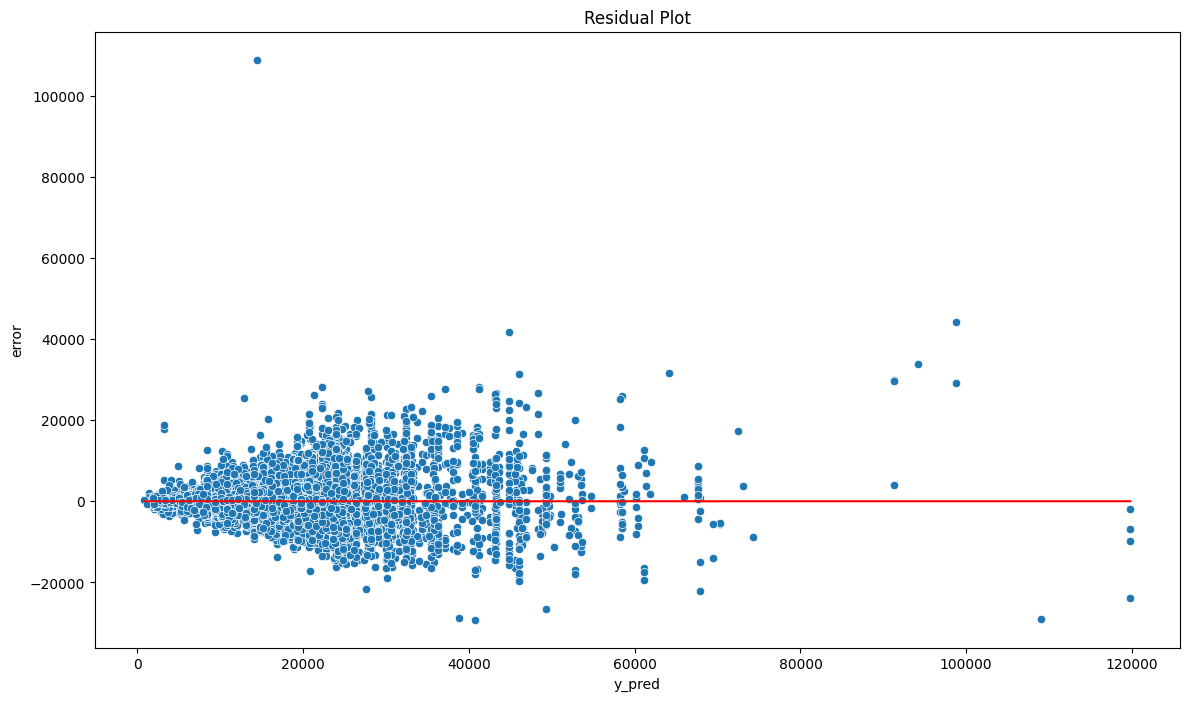

In [130]:
df_error = pd.DataFrame({
    "y_pred": y_pred,
    "error": (y_test - y_pred_xgb_tuning_2)
})

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_error, x="y_pred", y="error")
sns.lineplot(data=df_error, x="y_pred", y=0, color="r")
plt.title("Residual Plot")
plt.show()

The residual plot shows the relationship between the predicted values (`y_pred`) and the residual errors. A few key observations can be made:

1. **Heteroscedasticity**: The residuals appear to fan out as the predicted values increase, indicating that the variance of the errors increases with the predicted value. This suggests that the model may have higher error variance for larger predictions, which can be a sign that a transformation (e.g., log transformation) or further feature engineering might improve the model.
2. **Outliers**: There are some extreme values in the residual plot, particularly those with large positive or negative errors. These outliers could be worth investigating to determine if they represent data anomalies or if they indicate areas where the model could be further refined.
3. **Centered around Zero**: The residuals are generally centered around zero, which indicates that the model is unbiased, meaning it doesn't consistently overestimate or underestimate the target variable. This is a positive sign for model performance.

Overall, while the residual plot suggests some potential issues, particularly with heteroscedasticity and outliers, the model appears to provide a reasonable fit. Further refinement of the model, such as addressing these issues, could lead to better performance.

#### **Actual vs. Predicted Price**

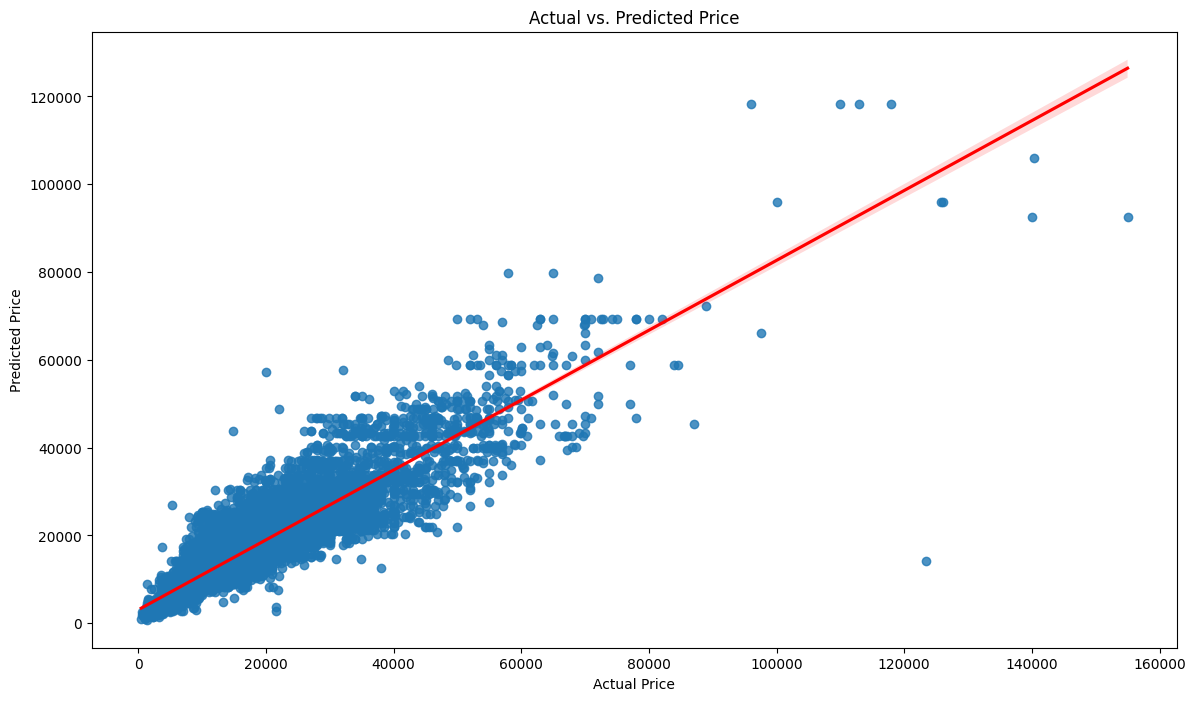

In [135]:
plt.figure(figsize=(14, 8))
plot = sns.regplot(x=y_test, y=y_pred_xgb_tuning_3, line_kws={"color": "red"}).set(title="Actual vs. Predicted Price", 
                                               xlabel="Actual Price", 
                                               ylabel="Predicted Price");

The **Actual vs. Predicted Price** plot compares the predicted prices with the actual prices. Key insights from the plot are:

1. **Strong Linear Relationship**: The points are mostly clustered around the red line, which indicates that the model's predictions are generally close to the actual prices. The closer the points are to the line, the better the model's performance, showing a strong predictive accuracy.
2. **Outliers**: There are a few points that deviate significantly from the line, particularly at the higher predicted prices. These outliers could indicate specific cases where the model struggles, possibly due to extreme values or rare cases that are harder for the model to generalize.
3. **Model Performance**: Given that most of the points align well with the red line, we can infer that the model is performing well overall. However, the presence of outliers suggests that further improvements, such as more feature engineering or considering additional model complexities, might help to reduce these discrepancies.

Overall, the model demonstrates strong predictive capabilities, but attention may be needed to address a few outliers or edge cases where the predictions significantly diverge from the actual values.

#### **Features Importance**

<Axes: title={'center': 'Feature Importances'}>

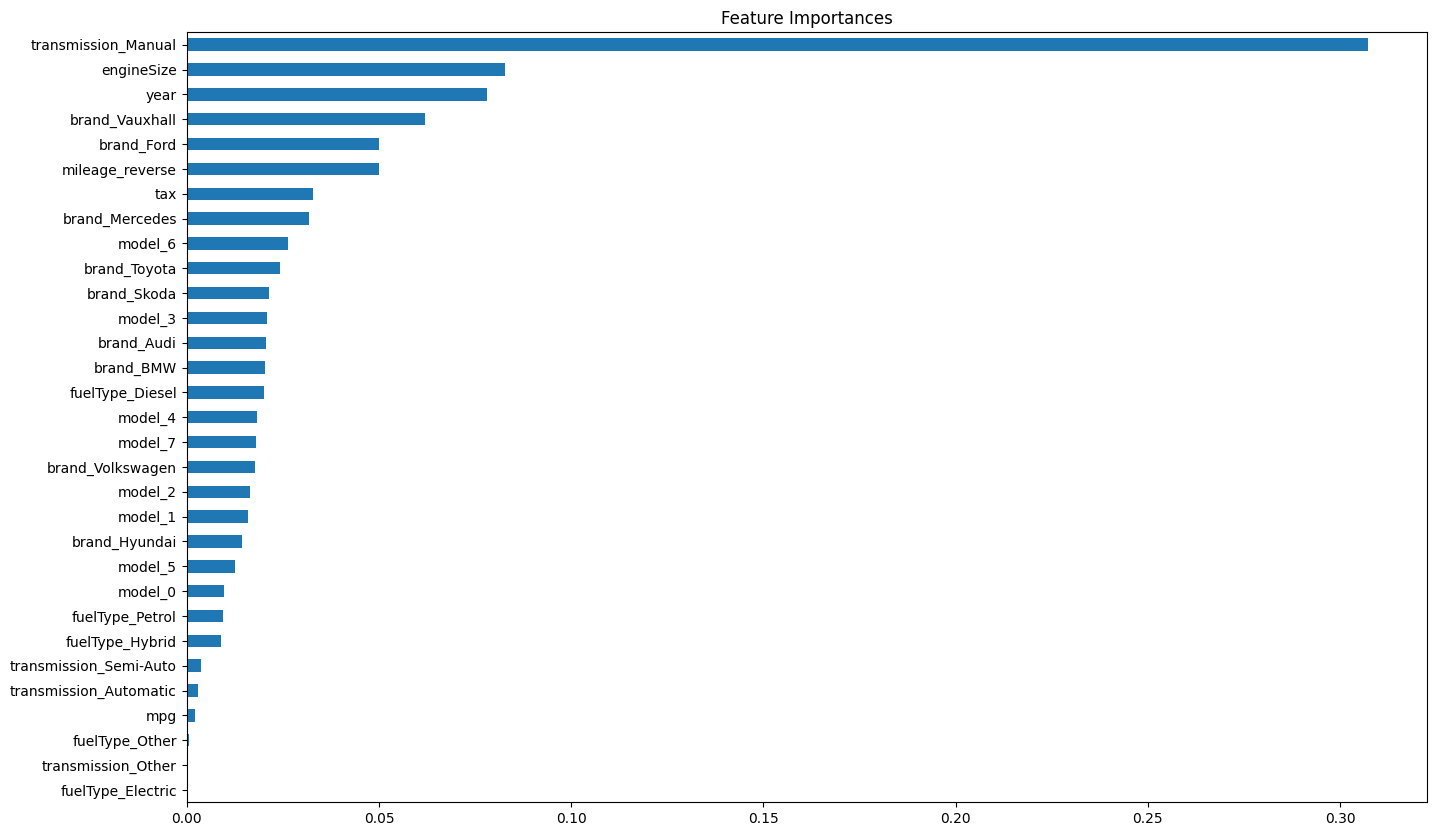

In [ ]:
# Get feature names from the 'Binning Scaling' and 'Binning Scaling Reverse' transformations
binning_transformer = transformer.transformers_[0][1]
binning_reverse_transformer = transformer.transformers_[1][1] 

# Get feature names from KBinsDiscretizer
feature_names_binning = binning_transformer.named_steps["Binning"].get_feature_names_out(input_features=["year", "mpg", "tax", "engineSize"])

# Manually create the feature names for the 'ReverseOrderBinning' transformer (which only transforms 'mileage')
feature_names_reverse = ["mileage_reverse"]

# Feature names from one-hot encoding and binary encoding
onehot_features = transformer.transformers_[2][1].get_feature_names_out(["brand", "transmission", "fuelType"])
binary_features = transformer.transformers_[3][1].get_feature_names_out(["model"])

# Combine all the feature names
feature_names = list(feature_names_binning) + list(feature_names_reverse) + list(onehot_features) + list(binary_features)

# Create a Series of feature importances
feature_imp = pd.Series(underlying_model.feature_importances_, index=feature_names).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(16,10))
feature_imp.sort_values().plot(kind="barh", title="Feature Importances")

The **Feature Importances** plot highlights the relative importance of different features in the predictive model. Key observations are:

1. **Top Features**: 
   - **Transmission_Manual** is the most significant feature, indicating that manual transmission has the highest influence on the target variable, likely price.
   - **Engine Size** and **Year** are also highly impactful, suggesting that larger engines and newer models strongly correlate with the target variable.

2. **Brand Importance**:
   - Several brands, such as **Vauxhall**, **Ford**, and **Mercedes**, show high importance, reflecting the model's sensitivity to brand value in determining the target variable.
   - This indicates that brand reputation or perceived quality plays a significant role in pricing.

3. **Mileage and Tax**: 
   - Reverse mileage (likely lower mileage being better) and tax levels are moderately important, which aligns with how these factors affect the market value of vehicles.

4. **Lesser-Impact Features**:
   - Features such as **fuelType_Electric**, **fuelType_Other**, and **Transmission_Automatic/Semi-Auto** have minimal impact, suggesting that they either lack variability or are less relevant in this dataset.

5. **Insight for Improvement**:
   - The lower importance of some features, like **mpg (miles per gallon)** or certain model numbers, could indicate they are either redundant, poorly encoded, or less relevant for this prediction task. Reviewing these features might streamline the model.

Overall, the plot reveals that transmission type, engine size, and brand are key factors influencing the target variable. This insight can guide future feature engineering efforts and model refinement.

#### **SHAP Values**

100%|===================| 84760/84772 [46:55<00:00]        

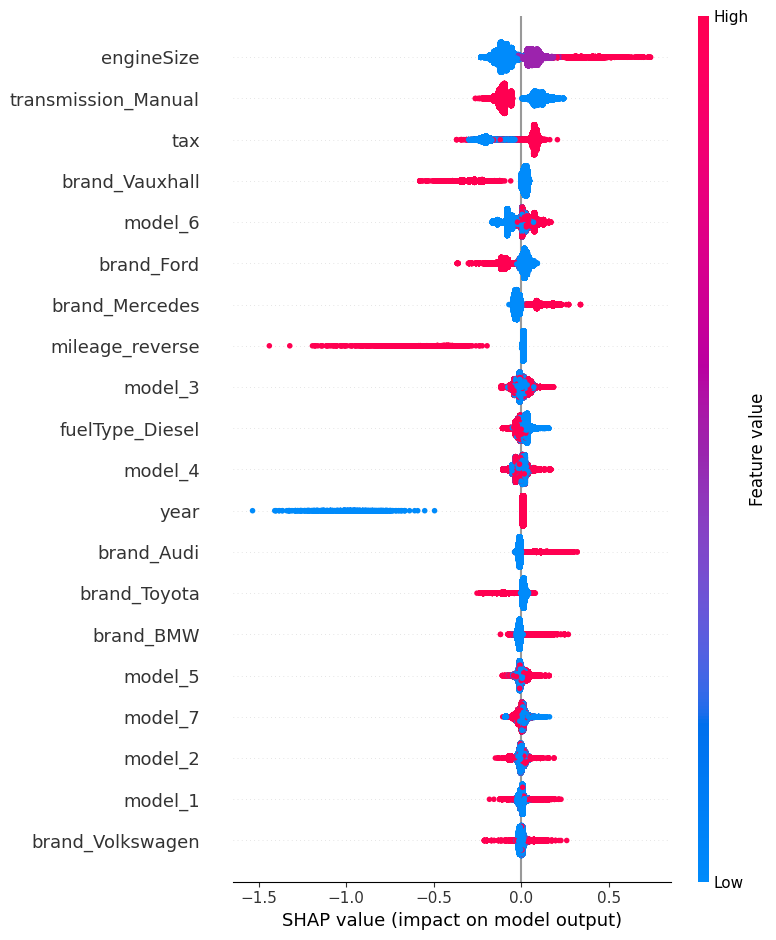

In [146]:
import shap

feature_names_reverse = ["mileage_reverse"]

binning_transformer = random_xgb_2.best_estimator_[0].transformers_[0][1]
col_names_binning = binning_transformer.get_feature_names_out(input_features=["year", "mpg", "tax", "engineSize"])

onehot_features = random_xgb_2.best_estimator_[0].transformers_[2][1].get_feature_names_out(["brand", "transmission", "fuelType"])
binary_features = random_xgb_2.best_estimator_[0].transformers_[3][1].get_feature_names_out(["model"])

col_names = list(col_names_binning) + list(feature_names_reverse) + list(onehot_features) + list(binary_features)

best_model = random_xgb_2.best_estimator_["modeling"].regressor_

# Apply the transformations on the training data
data = pd.DataFrame(random_xgb_2.best_estimator_[0].fit_transform(X_train), columns=col_names)

# Define SHAP explainer
explainer = shap.TreeExplainer(best_model, data=data)

# Get SHAP values for the transformed data
shap_values = explainer.shap_values(data)

# Create a summary plot of the SHAP values
shap.summary_plot(shap_values, data, feature_names=col_names)

This SHAP (SHapley Additive exPlanations) summary plot provides insights into how individual features influence the model's predictions. Key observations include:

1. **Feature Importance**:
   - Features are ordered by importance, with **engineSize** and **transmission_Manual** being the most influential.
   - **Tax**, **brand_Vauxhall**, and **model_6** also significantly impact predictions.

2. **Feature Value Effect**:
   - The colors represent feature values (red = high, blue = low). High values of **engineSize** (red) tend to increase predictions, while low values (blue) decrease them.
   - For **transmission_Manual**, the impact appears more balanced, with both high and low feature values affecting predictions in different directions.

3. **Positive and Negative Contributions**:
   - SHAP values on the x-axis represent the feature's impact on the model's output. Positive SHAP values push predictions higher, while negative values lower them.
   - For example, **brand_Vauxhall** shows that higher feature values (red) tend to increase the prediction, whereas lower values (blue) have a negative effect.

4. **Interactions and Variability**:
   - **Mileage_reverse** and **fuelType_Diesel** have distinct clusters, indicating variability in their influence. This suggests interactions with other features, like mileage affecting vehicles differently depending on the brand or model.

5. **Insights for Feature Engineering**:
   - Some features like **model_7** and **brand_Volkswagen** show smaller SHAP values, implying a lesser role in prediction. These could be reviewed to determine if they add meaningful value or can be simplified.

Overall, this plot highlights how individual feature values drive model predictions, offering transparency into the model's decision-making process and potential areas for refinement.

---

## **Conclusion and Recommendations**

The analysis of around 105,966 UK used car listings revealed significant insights into pricing trends, key influencers, and market dynamics. 

---

### **Key Findings**

1. **Significant Price Influencers:**
   - **Mileage:** Cars with lower mileage hold higher resale values, underscoring the importance of usage in price determination.  
   - **Fuel Type:** Hybrid and electric vehicles command premium prices, reflecting growing consumer preference for sustainable options.  
   - **Engine Size:** Mid-range engine sizes (1.4L–2.0L) strike a balance between performance and efficiency, appealing to a wide market segment.  
   - **Transmission Type:** Automatic vehicles, especially premium brands, retain higher resale value due to their convenience and preference in modern markets.

2. **Brand and Market Trends:**
   - **Premium brands** such as BMW, Mercedes, and Audi showed strong price retention, signaling high demand and sustained appeal.  
   - Automatic transmission and hybrid fuel types emerged as strong value contributors for resale.

3. **Depreciation Trends:**
   - Vehicles depreciate rapidly within the first three years, losing up to **50%** of their value, while depreciation slows in older models, increasing their attractiveness in the budget segment.  
   - Newer models with advanced features (e.g., hybrid engines) exhibited slower depreciation rates, emphasizing the value of innovation in sustaining price.  

---

### **Model Performance**

The **Extreme Gradient Boosting (XGB_2)** model emerged as the best-performing predictor:

- **Root Mean Square Error (RMSE):** **£4,157.48** – With the range of £450 to £159,999, the model's average prediction error is £4,157, approximately 2.6% of the upper price range (£159,999). This level of accuracy is suitable for the wide variability in used car prices.

- **Mean Absolute Error (MAE):** **£2,693.93** – The average deviation of predictions is £2,693, which is precise enough for most pricing scenarios, particularly for mid-range vehicles.

- **Mean Absolute Percentage Error (MAPE):** **16.6%** – Classifies the model’s accuracy as "good forecast," per **Lewis (1982)** standards.
  - **<10%:** Highly accurate forecast.
  - **11–20%:** Good forecast.
  - **21–50%:** Reasonable forecast.
  - **>50%:** Inaccurate forecast.

---

### **Model Limitations**

While the Extreme Gradient Boosting (XGB_2) model demonstrated strong predictive performance, there are inherent limitations:  

1. **Limited Feature Scope:** The model relies on a subset of features, such as mileage, fuel type, engine size, and transmission type, which may not fully capture the complexity of the UK used car market. Additionally, the available features have a limited range of values; for instance, mpg and mileage do not cover the full spectrum of possibilities. Critical factors like vehicle condition, ownership history, insurance costs, and market trends are also missing, potentially impacting the model's accuracy.

2. **Market Dynamics:** The model does not account for external influences such as regional economic factors, seasonal demand variations, or shifting consumer preferences, which could significantly affect car pricing.  

3. **Static Data:** The dataset represents a snapshot in time, and the model does not adapt to real-time market fluctuations. This limitation may result in less accurate predictions as market conditions evolve.  

Addressing these limitations in future iterations by incorporating additional features and real-time data can enhance the model's predictive power and relevance to the UK used car market.

---

### **Recommendations**

#### **For the Business:**
1. **Optimize Listings:**  
   - Feature high-demand vehicles, such as cars with **low mileage**, **hybrid fuel options**, and **newer models** prominently in listings.  
   - Ensure detailed descriptions and high-quality images to enhance buyer engagement.  

2. **Focus on Premium Brands:**  
   - Emphasize offerings from brands like BMW, Mercedes, and Audi, which have the highest overall price range and strong resale value, positioning them as premium options. Develop strategies to highlight these brands on the platform, such as premium listings, targeted promotions, and enhanced visibility features.

3. **Combat Depreciation:**  
   - Offer **trade-in programs and flexible financing options** to attract customers and mitigate the effects of rapid early depreciation. **Trade-in programs** allow customers to exchange their old vehicles for credit toward new purchases, offering convenience and reducing the financial burden. **Flexible financing options**, such as low-interest loans make cars more affordable by spreading costs over time. Combining these strategies can accelerate sales, enhance customer retention, and reduce depreciation risks for unsold inventory.

4. **Eco-Friendly Vehicle Promotion:**  
   - To align with the growing trend toward sustainability and attract eco-conscious customers, prioritize highlighting hybrid and electric models, leveraging their increasing demand driven by technological advancements.  

#### **For Future Research and Model Development:**
1. **Expand Dataset Features:**  
   - Include additional factors such as **vehicle condition**, **insurance costs**, and **ownership history** to improve prediction accuracy and capture more nuanced influences on price.

2. **Investigate Long-Term Trends:**  
   - Analyze evolving trends in fuel types, such as the transition to electric vehicles, and their implications for pricing and depreciation.

3. **Real-Time Insights:**  
   - Develop models that incorporate live market data to adjust pricing dynamically, ensuring competitive and accurate valuations.

4. **Use Grid Search (If Possible):**  
   - GridSearchCV is ideal for finding the best hyperparameters as it exhaustively evaluates all combinations, potentially leading to better results. However, due to time and resource constraints, we used **HalvingGridSearchCV** and **RandomizedSearchCV**, which are faster alternatives that balance efficiency and performance. If resources allow, prioritize GridSearchCV for more robust outcomes.

---

By applying these findings and recommendations, stakeholders can refine pricing strategies, enhance customer satisfaction, and stay ahead of evolving trends in the UK used car market. This proactive approach fosters long-term profitability and secures a competitive edge. To explore the interactive data analysis dashboard, visit: https://public.tableau.com/app/profile/sultan.pasya/viz/UKUsedCarDashboard/Home

---